# FORMULA 1 - 2021 SEASON ANALYSIS

## Created by Collins

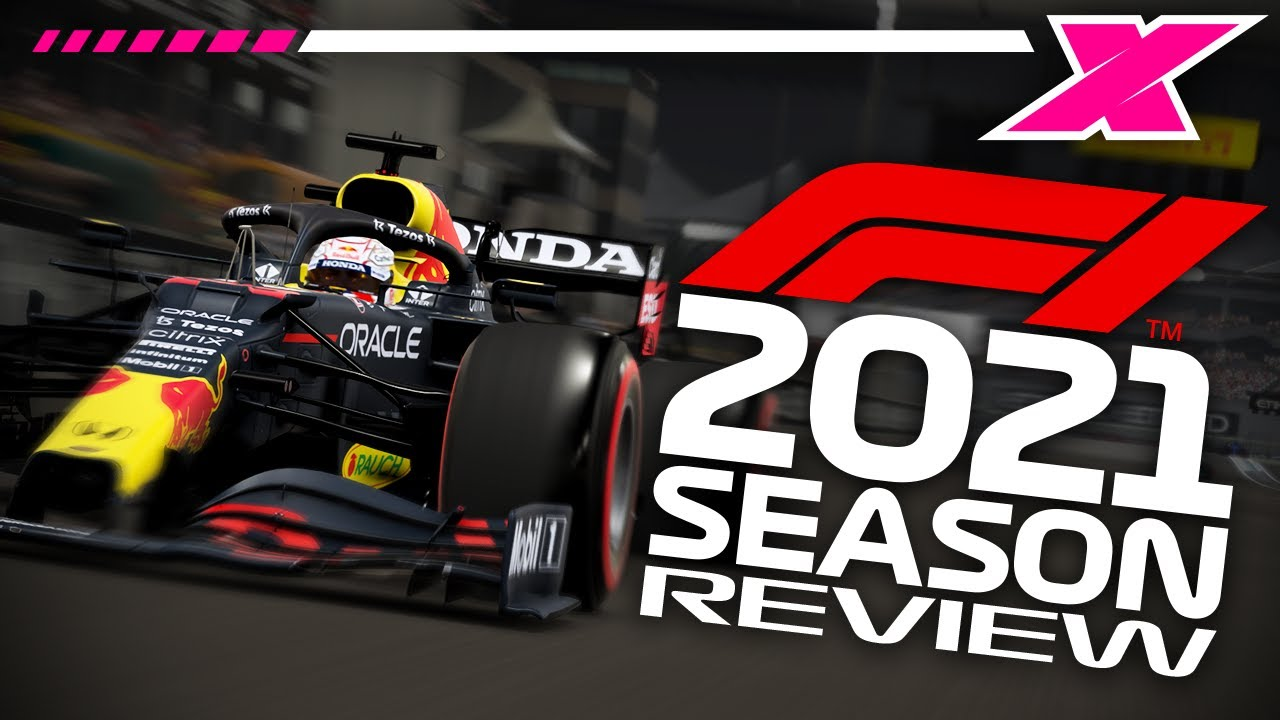

In [2]:
from IPython.display import Image
Image(r'C:\Users\myloc\Downloads\maxresdefault.jpg')

## WELCOME TO THE DATA ANALYSIS OF FORMULA 1 2021 SEASON!

Welcome to the data analysis of F1 2021 Season! It was an immensely action-packed, thrilling, and fabulous season that  made itself in the history! The main elements, without any doubt, were the Red Bull driver **Max Verstappen** and the Mercedes driver **Lewis Hamilton**. Their challanges to each other started since the very first race of the season and sustained until the last race! While watching the session (no matter it was practice, qualifying, or race) in weekends, we always wondered how these would be resulted, what kind of strategies could be applied in order to get ahead of the rivals, or if any unexpected things would happen; especially for these afor-mentioned two drivers, as well as the others and teams when they found important opportunities and lived the superior moments in some races of the championship.

In the meantime, **the effects of Covid-19 pandemic** continued throughout the season, hence some popular races were cancelled and removed from the initial calendar, replaced with others to keep the number of races high. Plus, some drivers got caught by the virus before some race weekend and that made them impossible to attend to the grid!

By all manner of means, this season will be remembered **mostly for struggles between Verstappen and Hamilton**, including **their teams Red Bull and Mercedes** with many highs and lows. But, as for the rules, there was **only one winner** to take the championship title of drivers and constructors. That's why, this analysis notebook encompasses lots of explanations for how the season progressed till the end, iconic moments of several races to remind ourselves and tables/visualizations to better understand the outcomes in all aspects. I totally believe that you will not regret while reading all of them below!

**For this purpose, let's import the necessary modules, load the data related to F1 2021 Season for the analyses, in addition to a method implementation that helps assign the correct colors for the drivers and teams when it comes to data visualization.**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import timedelta
%matplotlib inline

In [5]:
import matplotlib.font_manager as fm

# Path to the custom font file
font_path = r'C:\Users\myloc\Downloads\Vogue.ttf'

# Add the custom font to the font manager
fm.fontManager.addfont(font_path)

# Optionally, set the font as the default for plots
plt.rcParams['font.family'] = 'Vogue'


In [6]:
calendar = pd.read_csv(r'C:\Users\myloc\OneDrive\Documents\IT Projects\FORMULA 1 PROJECT\F1 21\formula1_2021season_calendar.csv')
calendar.set_index('Round', inplace=True)
drivers = pd.read_csv(r'C:\Users\myloc\OneDrive\Documents\IT Projects\FORMULA 1 PROJECT\F1 21\formula1_2021season_drivers.csv')
drivers.set_index('Abbreviation', inplace=True)
teams = pd.read_csv(r'C:\Users\myloc\OneDrive\Documents\IT Projects\FORMULA 1 PROJECT\F1 21\formula1_2021season_teams.csv')
teams.index = range(1,11)
sprintQualiResults = pd.read_csv(r'C:\Users\myloc\OneDrive\Documents\IT Projects\FORMULA 1 PROJECT\F1 21\formula1_2021season_sprintQualifyingResults.csv')
raceResults = pd.read_csv(r'C:\Users\myloc\OneDrive\Documents\IT Projects\FORMULA 1 PROJECT\F1 21\formula1_2021season_raceResults.csv')

In [7]:
def assign_color(val_type, values):
    cl = []
    for val in values:
        if val_type == 'drivers':  abbr = val.split()[1].upper()[0:3]
        elif val_type == 'teams':  abbr = val[0:4].upper()
        if abbr in ['ALFA','RAI','GIO','KUB']:   cl.append('#900000')
        elif abbr in ['HAAS','SCH','MAZ']:       cl.append('#ffffff')
        elif abbr in ['ASTO','VET','STR']:       cl.append('#006f62')
        elif abbr in ['WILL','RUS','LAT']:       cl.append('#0072ff')
        elif abbr in ['ALPH','GAS','TSU']:       cl.append('#2b5962')
        elif abbr in ['MCLA','RIC','NOR']:       cl.append('#ff8700')
        elif abbr in ['RED ','VER','PER']:       cl.append('#0600f0')
        elif abbr in ['FERR','LEC','SAI']:       cl.append('#cb0000')
        elif abbr in ['MERC','HAM','BOT']:       cl.append('#00d2bd')
        elif abbr in ['ALPI','ALO','OCO']:       cl.append('#0090ff')
    return cl

## 2021 Season - Race Calendar

In [9]:
calendar[['GP Name', 'Country', 'City', 'Circuit Name', 'Race Date', 'Number of Laps', 'Turns', 'DRS Zones', 
          'Race Distance(km)', 'Lap Record', 'Record Owner', 'Record Year']]

,GP Name,Country,City,Circuit Name,Race Date,Number of Laps,Turns,DRS Zones,Race Distance(km),Lap Record,Record Owner,Record Year
Round,,,,,,,,,,,,
1,Bahrain,Bahrain,Sakhir,Bahrain International Circuit,28 Mar 2021,57,15,3,308.238,1:31.447,Pedro de la Rosa,2005
2,Emilia Romagna,Italy,Imola,Autodromo Enzo e Dino Ferrari,18 Apr 2021,63,19,1,309.049,1:15.484,Lewis Hamilton,2020
3,Portugal,Portugal,Portimao,Autodromo Internacional do Algarve,02 May 2021,66,15,1,306.826,1:18.750,Lewis Hamilton,2020
4,Spain,Spain,Catalunya,Circuit de Barcelona-Catalunya,09 May 2021,66,16,2,308.424,1:18.149,Max Verstappen,2021
5,Monaco,Monaco,Monte Carlo,Circuit de Monaco,23 May 2021,78,19,1,260.286,1:12.909,Lewis Hamilton,2021
6,Azerbaijan,Azerbaijan,Baku,Baku City Circuit,06 Jun 2021,51,20,2,306.049,1:43.009,Charles Leclerc,2019
7,France,France,Le Castellet,Circuit Paul Ricard,20 Jun 2021,53,15,2,309.690,1:32.740,Sebastian Vettel,2019
8,Styria,Austria,Spielberg,Red Bull Ring,04 Jul 2021,71,10,3,306.452,1:05.619,Carlos Sainz,2020
9,Austria,Austria,Spielberg,Red Bull Ring,18 Jul 2021,71,10,3,306.452,1:05.619,Carlos Sainz,2020


The table gives us lots of information about the tracks, including race dates, number of laps, turns, total race distance, and current holder of lap time record.

In total, **22 races** were organized in **20 different countries**. As you know, **Italy** became the home of two races this season. One was in Imola (named _Emilia Romagna GP_) and the other was in Monza, the Temple of Speed. Furthermore, **Austria** held the grand prix twice under the names _Styria_ and _Austria GP_, in Red Bull Ring.

Due to the **continuous effects of Covid-19 pandemic** worldwide, some races were ruled out several weeks or months before their official dates. To the best of knowledge, these were **Canada**, **Australia**, **Japan** and **Singapore**. These have been replaced with other tracks that also existed in 2020, such as **Imola**, **Portugal** and **Turkey**. Additionally, there were new tracks hosting an F1 event for the first time: **Qatar** and **Saudi Arabia**.

## 2021 Season - Teams

In [12]:
teams

,Team,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
1,Mercedes,Mercedes-AMG Petronas Formula One Team,"Brackley, United Kingdom",Toto Wolff,Mike Elliott,W12,Mercedes,1970,8,1(x115),127,85
2,Red Bull,Red Bull Racing,"Milton Keynes, United Kingdom",Christian Horner,Pierre Waché,RB16B,Honda,1997,4,1(x75),73,76
3,Ferrari,Scuderia Ferrari,"Maranello, Italy",Mattia Binotto,Enrico Cardile / Enrico Gualteri,SF21,Ferrari,1950,16,1(x239),223,253
4,McLaren,McLaren F1 Team,"Woking, United Kingdom",Andreas Seidl,James Key,MCL35M,Mercedes,1966,8,1(x183),156,160
5,Alpine,Alpine F1 Team,"Enstone, United Kingdom",Davide Brivio,Pat Fry / Remi Taffin,A521,Renault,1986,2,1(x21),20,15
6,AlphaTauri,Scuderia AlphaTauri,"Faenza, Italy",Franz Tost,Jody Egginton,AT02,Honda,1985,0,1(x2),1,2
7,Aston Martin,Aston Martin Cognizant Formula One Team,"Silverstone, United Kingdom",Otmar Szafnauer,Andrew Green,AMR21,Mercedes,2018,0,1(x1),1,0
8,Williams,Williams Racing,"Grove, United Kingdom",Jost Capito,François-Xavier Demaison,FW43B,Mercedes,1978,9,1(x114),129,133
9,Alfa Romeo,Alfa Romeo F1 Team ORLEN,"Hinwil, Switzerland",Frédéric Vasseur,Jan Monchaux,C41,Ferrari,1993,0,1(x1),1,5
10,Haas,Uralkali Haas F1 Team,"Kannapolis, United States",Guenther Steiner,Simone Resta,VF-21,Ferrari,2016,0,4(x1),0,2


In this season, there were total of **10 teams** competed in Formula 1 and this number hasn't been changed since 2017.

Here, the table reveals information such as the location of their base, name of their team and technical chief, chassis of their cars, manufacturer of the power unit, as well as the accomplishments they had done up until 2021.

There are some noticeable changes, though:
* **Alpine** was been re-branded from **Renault** which was known with their yellow-based livery. The French team adopted to blue-weighted color, plus some white and red to represent the French flag under their logo and chassis. They still used the same Renault power unit.
* The other team with the rebrand was **Aston Martin**, formerly known as **Racing Point** (and even earlier, **Force India**) with the pink livery. It was quite exciting to see the British luxury car manufacturer back in Formula 1 and represented by the little darker and shiny green color (reflecting the British racing green). Their engine supplier, Mercedes, remained unchanged.
* **Mercedes-AMG Petronas**, which is known with the silver livery, continued to use their black-weighted one on W12, similar to 2020.
* **Williams** had substantial changes to their livery on their FW43B, to better commemorate the past achievements and colors they used in 90s.
* **Haas** found a new naming sponsor Uralkali (from Russia), thus minor changes have been made to their livery to reflect the Russian flag, especially on the front wing and the side. Doesn't it look strange as the team appeared with the colors that could cause a confusion if this was American or Russian?

## 2021 Season - Drivers

In [15]:
drivers[['Number', 'Driver', 'Country', 'Date of Birth', 'Place of Birth', 'Team', 'World Championships', 'Grands Prix Entered',
         'Podiums', 'Points', 'Highest Race Finish', 'Highest Grid Position']]

,Number,Driver,Country,Date of Birth,Place of Birth,Team,World Championships,Grands Prix Entered,Podiums,Points,Highest Race Finish,Highest Grid Position
Abbreviation,,,,,,,,,,,,
HAM,44,Lewis Hamilton,United Kingdom,07/01/1985,"Stevenage, England",Mercedes,7,288,182,4165.5,1(x103),1
BOT,77,Valtteri Bottas,Finland,28/08/1989,"Nastola, Finland",Mercedes,0,178,67,1738.0,1(x10),1
VER,33,Max Verstappen,Netherlands,30/09/1997,"Hasselt, Belgium",Red Bull Racing,1,141,60,1557.5,1(x20),1
PER,11,Sergio Perez,Mexico,26/01/1990,"Guadalajara, Mexico",Red Bull Racing,0,214,15,896.0,1(x2),2
LEC,16,Charles Leclerc,Monaco,16/10/1997,"Monte Carlo, Monaco",Ferrari,0,81,13,560.0,1(x2),1
SAI,55,Carlos Sainz,Spain,01/09/1994,"Madrid, Spain",Ferrari,0,141,6,536.5,2(x2),2
NOR,4,Lando Norris,United Kingdom,13/11/1999,"Bristol, England",McLaren,0,60,5,306.0,2(x1),1
RIC,3,Daniel Ricciardo,Australia,01/07/1989,"Perth, Australia",McLaren,0,210,32,1274.0,1(x8),1
OCO,31,Esteban Ocon,France,17/09/1996,"Evreux, Normandy",Alpine,0,89,2,272.0,1(x1),3


As there were 10 teams available, likewise, there were **20 drivers** (+1 reserve driver) competed in F1 2021 Season. You can see their info; for instance, nationality, place of birth, achievements in their careers up to and including this season.

What were the grid line-up changes then, compared to 2020?
* First of all, **Sergio Perez**, who raced for Racing Point (Aston Martin), was about to retire from Formula 1. However, Red Bull Racing saw his potential and transferred him as the teammate of Max Verstappen. That would make the Mexican happier that he grabbed a seat from a top team. As a consequence, Alexander Albon has been let go.
* In Ferrari, Charles Leclerc met a new teammate **Carlos Sainz**, who was transferred from McLaren. The four-time world champion **Sebastian Vettel**, who had been there since 2015, had announced to part from the Italian team and joined Aston Martin as a new chapter for the rest of his career, together with Lance Stroll.
* With the empty seat available for McLaren, they took **Daniel Ricciardo** from Renault (Alpine), to accompany with Lando Norris.
* About Renault, now-called Alpine, the two-time world champion **Fernando Alonso** came back to Formula 1 and joined the French team where he obtained the titles from in the past with that team. He raced with Esteban Ocon in the whole season.
* Pierre Gasly stayed in AlphaTauri and was accompanied by a Japanese rookie, **Yuki Tsunoda**.
* In Haas, their former drivers Romain Grosjean and Kevin Magnussen left the team. Instead, they hired two new rookies: **Mick Schumacher**, champion of Formula 2 2020 Season and son of the legend Michael Schumacher, and **Nikita Mazepin**.
* **Robert Kubica** was the only reserve driver who appeared in the grid, raced for Alfa Romeo in two grand prix events (Netherlands and Italy-Monza), replacing Kimi Raikkönen due to being tested positive for Covid-19.

## Several Notable Races of 2021 Season

This season has lasted for 22 races, but among all, there are several ones that stood out more compared to the others, with regards to exciting moments, weird incidents. Let's view the results of top 10 and put some discussions for these races:

### Grand Prix de Monaco 2021

In [19]:
MonacoResults = raceResults[raceResults['Track'] == 'Monaco'].set_index('Position').drop('Track', axis=1).head(10)
MonacoResults['Points'] = MonacoResults['Points'].astype(int)
MonacoResults

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,33,Max Verstappen,Red Bull Racing Honda,2.0,78,1:38:56.820,25,No,1:14.649
2,55,Carlos Sainz,Ferrari,4.0,78,+8.968,18,No,1:14.621
3,4,Lando Norris,McLaren Mercedes,5.0,78,+19.427,15,No,1:14.670
4,11,Sergio Perez,Red Bull Racing Honda,9.0,78,+20.490,12,No,1:14.552
5,5,Sebastian Vettel,Aston Martin Mercedes,8.0,78,+52.591,10,No,1:15.316
6,10,Pierre Gasly,AlphaTauri Honda,6.0,78,+53.896,8,No,1:15.412
7,44,Lewis Hamilton,Mercedes,7.0,78,+68.231,7,Yes,1:12.909
8,18,Lance Stroll,Aston Martin Mercedes,13.0,77,+1 lap,4,No,1:14.674
9,31,Esteban Ocon,Alpine Renault,11.0,77,+1 lap,2,No,1:15.316


It's the fifth grand prix of the season. **Monte Carlo circuit** in Monaco is always known as one of the most prestigious Formula 1 races in the history, and winning there brings **huge reputation** for the driver! Because the width of the circuit is too narrow overall, any mistake could put the drivers out of the race easily; it's like _riding a bicycle in a room!_

Well, there were **two things** that come up to our mind when remembering this grand prix: Firstly, it was **the native hero, Charles Leclerc**, who took the pole position, but **crashed into the barriers**, less than thirty seconds remaining before the end of the qualifying session and causing red flag. The damage on his car appeared that it could affect the engine and gearbox part badly as Ferrari did their best to repair everything. The next day, however, things got worse for the Monegasque driver, because he began losing power before lining up in the starting grid, and these previous issues seemed to continue. As a consequence, Leclerc was forced **to not participate in the race session**. What a big disappointment as he never successfully finished the home race in his career, up until this season!

Second, it was the Mercedes driver, **Valtteri Bottas**, who came in for pit-stop on lap around 30 for tyre change, but things became so strange where **one of the tyres could not come out** despite all efforts by pit stop mechanics! This was a very unlucky moment for the Finnish as he had nothing to do with that, but getting off of his car with frustration!

By looking at the results,**Max Verstappen** won this race, **his first at this location** in his career. Then, Carlos Sainz came second to mitigate the negative effects for Ferrari team in the whole weekend; and Lando Norris completed the podium. As a sidenote, McLaren raced here with one-off **Gulf Air livery**, containing light blue and orange colors.

### Azerbaijan Grand Prix 2021

In [22]:
AzerbaijanResults = raceResults[raceResults['Track'] == 'Azerbaijan'].set_index('Position').drop('Track', axis=1).head(10)
AzerbaijanResults['Points'] = AzerbaijanResults['Points'].astype(int)
AzerbaijanResults

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,11,Sergio Perez,Red Bull Racing Honda,6.0,51,2:13:36.410,25,No,1:44.687
2,5,Sebastian Vettel,Aston Martin Mercedes,11.0,51,+1.385,18,No,1:44.890
3,10,Pierre Gasly,AlphaTauri Honda,4.0,51,+2.762,15,No,1:45.220
4,16,Charles Leclerc,Ferrari,1.0,51,+3.828,12,No,1:45.382
5,4,Lando Norris,McLaren Mercedes,9.0,51,+4.754,10,No,1:45.326
6,14,Fernando Alonso,Alpine Renault,8.0,51,+6.382,8,No,1:45.624
7,22,Yuki Tsunoda,AlphaTauri Honda,7.0,51,+6.624,6,No,1:44.939
8,55,Carlos Sainz,Ferrari,5.0,51,+7.709,4,No,1:45.700
9,3,Daniel Ricciardo,McLaren Mercedes,13.0,51,+8.874,2,No,1:45.713


Here's the next race, **Baku Street Circuit** in Azerbaijan. **Charles Leclerc**'s curse seemed to continue as he again grabbed the pole position, but crashed into the wall before the end of the qualifying! This time, however, he was able to participate in the race and finished **4th**, as shown in the results table above.

In reality, the whole circumstances of the race had been changed althogether with a couple of laps remaining, when **Max Verstappen** was out of the race near the start-finish line **due to the blown tyre**, and raised the red flag . After the incident, the standing restart was performed and it looked like a very short sprint could only last for **two laps**. The most interesting moment was that Mercedes driver **Lewis Hamilton** had a massive lock-up before turn 1, which put him to the back of the grid and finished **15th**! _(Could this be because he forgot to disable the magic button that affected the temperature of his car's brakes?)_ On the other side, the star of the race was **Sergio Perez**, winning the Azerbaijan GP; this was his second victory of his career! Next, **Sebastian Vettel** came second, the first podium he had with Aston Martin. Then, **Pierre Gasly** reached the last step of the podium.

### Rolex Magyar Nagydij 2021 (Hungary)

In [25]:
HungaryResults = raceResults[raceResults['Track'] == 'Hungary'].set_index('Position').drop('Track', axis=1).head(11)
HungaryResults['Points'] = HungaryResults['Points'].astype(int)
HungaryResults

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,31,Esteban Ocon,Alpine Renault,8.0,70,2:04:43.199,25,No,1:21.421
DQ,5,Sebastian Vettel,Aston Martin Mercedes,10.0,70,+1.859,0,No,1:21.459
2,44,Lewis Hamilton,Mercedes,1.0,70,+2.736,18,No,1:18.715
3,55,Carlos Sainz,Ferrari,15.0,70,+15.018,15,No,1:21.423
4,14,Fernando Alonso,Alpine Renault,9.0,70,+15.651,12,No,1:20.359
5,10,Pierre Gasly,AlphaTauri Honda,5.0,70,+63.614,11,Yes,1:18.394
6,22,Yuki Tsunoda,AlphaTauri Honda,16.0,70,+75.803,8,No,1:22.450
7,6,Nicholas Latifi,Williams Mercedes,18.0,70,+77.910,6,No,1:22.831
8,63,George Russell,Williams Mercedes,17.0,70,+79.094,4,No,1:22.112


Now the Hungarian grand prix, before the summer break: The race was **started with rainy conditions** and while all cars coming into turn 1, lots of them, especially the mid-pack, **crashed into each other** while the rest tried to escape from those accidents! It was full of carnage that looked like **the beginning of a open lobby race** in F1 videogame! This resulted in several DNFs togeher with the red flag and consequently, **Stroll**, **Leclerc**, **Perez**, **Bottas** could not continue the race, later **Norris** and **Mazepin**.

Before the restart of the race, the track surface was **getting drier**, thus all the drivers (except one) were called to the pits for slick tyres, instead of getting on the starting grid. Yes, the driver without the pit at that moment was **Lewis Hamilton who started racing alone** after the lights out! One cannot argue that this was **one of the weirdest thing** we have experienced in 2021 Season and in Formula 1 history! Of course, he necessarily changed the tyres one lap later, putting him to the last place among all remaining drivers in the circuit.

Despite all these incidents happened, we saw **Esteban Ocon** leading the race afterwards and doing his best to hold **Sebastian Vettel** back all the time, while Hamilton was climbing up positions lap after lap, even the team urged him to win the race as he had the potential for that. However, Ocon's teammate **Fernando Alonso** defended the Briton for almost 10 laps, thus prevented him from new overtakes for a long time. In the end, it was unforgettable for Ocon that he was **the grand prix winner in Hungary**! Alonso, of course, congratulated him after the race; and yeah, it was a great teamwork effort for Alpine!

Sebastian Vettel could've come in second place, another podium with Aston Martin. However, he was **disqualified** after the race bacause the team **could not extract the required amount of fuel sample** from the car to be presented to FIA. Moreover, we witnessed **Williams** scoring points at last, after more than two years; it was fully emotional for **George Russell** during the interview as he obtained championship points under this team.

### Rolex Belgian Grand Prix 2021

In [28]:
raceResults[raceResults['Track'] == 'Belgium'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,33,Max Verstappen,Red Bull Racing Honda,1.0,1,0:03:27.071,12.5,No,NaN
2,63,George Russell,Williams Mercedes,2.0,1,+1.995,9.0,No,NaN
3,44,Lewis Hamilton,Mercedes,3.0,1,+2.601,7.5,No,NaN
4,3,Daniel Ricciardo,McLaren Mercedes,4.0,1,+4.496,6.0,No,NaN
5,5,Sebastian Vettel,Aston Martin Mercedes,5.0,1,+7.479,5.0,No,NaN
6,10,Pierre Gasly,AlphaTauri Honda,6.0,1,+10.177,4.0,No,NaN
7,31,Esteban Ocon,Alpine Renault,8.0,1,+11.579,3.0,No,NaN
8,16,Charles Leclerc,Ferrari,9.0,1,+12.608,2.0,No,NaN
9,6,Nicholas Latifi,Williams Mercedes,10.0,1,+15.484,1.0,No,NaN


Belgium Grand Prix this season was quite unusual, because there was always **torrential rain** on Saturday and Sunday, and that made the conditions very bad to drive these cars on the whole track surface for safety reasons! At least, we saw the qualifying session doable, and you can be astonished that how **George Russell** claimed the **2nd place**, i.e. the front row sharing with Max Verstappen and even outqualifying Hamilton!

In the next day, everybody can accept that **the race was never actually happened**! All people watching on TV and those at grandstands or open areas in Spa-Franchorchamps got bored as we were not able to see the cars going around the track within the allowed 3 hours race time while there was heavy rain all the time! The only solution was to **get all the cars out for 2 laps** (the results above said 1 lap, but it doesn't matter), escorted by the Safety Car, in the moment when the effect of the rain was diminished and there was less aquaplanning; hence **half of the points** could be distributed for the top 10, according to the results of qualifying session. In the end, **Verstappen** was announced as the winner of this grand prix, while **Russell** and **Hamilton** deserved to step on the podium, as 2nd and 3rd, respectively.

Here, let me share the race note, directly taken from Formula 1 official web site:

"_Half points awarded, as less than 75 percent of the original race distance was completed. Results were calculated in accordance with Article 51.14 of the FIA Formula One Sporting Regulations, namely at the end of lap 1 being the penultimate lap during which the signal to suspend the race was given. However, for the determination of points, Article 6.5 was applicable, the leader having crossed the Control Line 3 times, therefore complying with the requirement for the leader to have completed more than 2 laps in order of half points to be awarded._"

### Heineken Gran Premio D'Italia 2021

In [31]:
ItalyResults = raceResults[raceResults['Track'] == 'Italy'].set_index('Position').drop('Track', axis=1).head(10)
ItalyResults['Points'] = ItalyResults['Points'].astype(int)
ItalyResults

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,3,Daniel Ricciardo,McLaren Mercedes,2.0,53,1:21:54.365,26,Yes,1:24.812
2,4,Lando Norris,McLaren Mercedes,3.0,53,+1.747,18,No,1:24.971
3,77,Valtteri Bottas,Mercedes,19.0,53,+4.921,15,No,1:24.872
4,16,Charles Leclerc,Ferrari,5.0,53,+7.309,12,No,1:25.319
5,11,Sergio Perez,Red Bull Racing Honda,8.0,53,+8.723,10,No,1:25.156
6,55,Carlos Sainz,Ferrari,6.0,53,+10.535,8,No,1:25.559
7,18,Lance Stroll,Aston Martin Mercedes,9.0,53,+15.804,6,No,1:25.853
8,14,Fernando Alonso,Alpine Renault,10.0,53,+17.201,4,No,1:25.472
9,63,George Russell,Williams Mercedes,14.0,53,+19.742,2,No,1:25.835


Now, the Italian Grand Prix in Monza, one of the iconic circuits also known as _the Temple of Speed_.

Surely, the most unforgettable moment there was **the collision between Verstappen and Hamilton** on lap 26. The Dutchman attempted to overtake the British driver coming into turn 1, but after the tyre contact together with the sausage kerb, Verstappen's Red Bull lifted up into the air and then its back side landed on Hamilton's Mercedes, pushing it into the sand pool. Additionally, the scary moment there, without a doubt, was the rear right tyre of Verstappen's car **touching Hamilton's helmet**, but he was left unharmed, thanks to the **protection provided by halo**, preventing him from getting serious injury. All things considered, both drivers became DNF and walked away from the track unpleased, overall another red flag due to this incident...

On the other hand, **McLaren** absolutely lived a wonderful weekend in Monza! Without the existence of two biggest rivals there, and with their strong pace, **Daniel Ricciardo** won the race and his teammate **Lando Norris** finished second! If you ask what these meant for this team, it was **their first win after 9 years** and nonetheless, **first 1-2 double finish since 2010**! What a great achievement for the name of British luxury sports car manufacturer, that they took all the opportunities to claim the win they missed for almost a decade!

### Rolex Turkish Grand Prix 2021

In [34]:
TurkeyResults = raceResults[raceResults['Track'] == 'Turkey'].set_index('Position').drop('Track', axis=1).head(10)
TurkeyResults['Points'] = TurkeyResults['Points'].astype(int)
TurkeyResults

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,77,Valtteri Bottas,Mercedes,1.0,58,1:31:04.103,26,Yes,1:30.432
2,33,Max Verstappen,Red Bull Racing Honda,2.0,58,+14.584,18,No,1:32.759
3,11,Sergio Perez,Red Bull Racing Honda,6.0,58,+33.471,15,No,1:32.459
4,16,Charles Leclerc,Ferrari,3.0,58,+37.814,12,No,1:32.737
5,44,Lewis Hamilton,Mercedes,11.0,58,+41.812,10,No,1:32.763
6,10,Pierre Gasly,AlphaTauri Honda,4.0,58,+44.292,8,No,1:32.814
7,4,Lando Norris,McLaren Mercedes,7.0,58,+47.213,6,No,1:32.446
8,55,Carlos Sainz,Ferrari,19.0,58,+51.526,4,No,1:31.921
9,18,Lance Stroll,Aston Martin Mercedes,8.0,58,+82.018,2,No,1:32.608


It was great to see the **Turkish GP** once more in this season's calendar, after 2020; where the race in Istanbul Park Circuit was marked as one the most exciting races, mainly due to the effect of rainy conditions that could challenge the drivers all the time, resulted in **Lance Stroll**'s astounding pole position and **Lewis Hamilton**'s obtainment of 7th world championship title!

This year, the days of that weekend coincided with **mixed weather conditions**, but the effect of rain when occurred was less severe, compared to 2020. Here, **Valtteri Bottas** had a perfect race on Sunday by starting in pole position (actually, his teammate Hamilton, but received grid penalties for new power unit components), leading every lap, setting the fastest lap and certainly, crowned for the win! Both Red Bull drivers' pace were not enough the catch the Mercedes driver up, thus Verstappen and Perez finished in the podium alongside him. Furthermore, it was special for Red Bull as they presented a **white livery** on their cars to **commemorate the past accomplishments by their engine supplier, Honda**.

There should also be one more thing to mention that **Esteban Ocon** completed the race with **the same intermediate tyre** all the time (although he was 1 lap behind the leader and finished 10th to claim the last point, plus **no mandatory pit-stop to change the tyre compound** when the track surface was wet)! We believe that Alpine team and Ocon himself had their hearts in their mouths as the rubber (mostly the front left tyre) was getting thinner every lap, but luckily, it didn't explode before the race finish.

### Heineken Gran Premio de Sao Paulo 2021 (Brazil)

In [37]:
BrazilResults = raceResults[raceResults['Track'] == 'Brazil'].set_index('Position').drop('Track', axis=1).head(10)
BrazilResults['Points'] = BrazilResults['Points'].astype(int)
BrazilResults

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,44,Lewis Hamilton,Mercedes,10.0,71,1:32:22.851,25,No,1:11.982
2,33,Max Verstappen,Red Bull Racing Honda,2.0,71,+10.496,18,No,1:12.486
3,77,Valtteri Bottas,Mercedes,1.0,71,+13.576,15,No,1:12.526
4,11,Sergio Perez,Red Bull Racing Honda,4.0,71,+39.940,13,Yes,1:11.010
5,16,Charles Leclerc,Ferrari,6.0,71,+49.517,10,No,1:12.822
6,55,Carlos Sainz,Ferrari,3.0,71,+51.820,8,No,1:12.710
7,10,Pierre Gasly,AlphaTauri Honda,7.0,70,+1 lap,6,No,1:13.227
8,31,Esteban Ocon,Alpine Renault,8.0,70,+1 lap,4,No,1:14.430
9,14,Fernando Alonso,Alpine Renault,12.0,70,+1 lap,2,No,1:13.922


The Brazilian GP in Interlagos usually contained thrilling moments in the past, and this season, we have experienced familiar things such that the main focus point was **Lewis Hamilton** in the whole weekend.

Everything started with the Briton's car being marked as **illegal** after the qualifying because of **the rear-wing rule infringement**, resulted in starting at the back of the grid in Sprint qualifying (see details below). However, Hamilton showed his strength, climbed up positions lap after lap and succeeded to place in **5th** after the end of that session, but another grid penalty was applied due to additional usage of power unit elements, hence readied himself to start the main race in **10th**.

His perseverance continued even on Sunday; during the race we saw him overtaking rivals in the first couple of laps to reach Red Bulls, especially Max Verstappen, and his mind was telling him to take the race victory at all costs! Through the rest of the race, we have sighted **several fights between these two drivers** while also being as fair as possible with respect to track limits. Of course, their teammates, Bottas and Perez, accompanied them behind or side-to-side to support and show their superorities against each other.

As a consequence, **Hamilton took the chequered flag first**, while his closest rival Verstappen crossed the finish line as second! Then, their teammates came after them, but Perez from Red Bull **strategically stole the fastest lap point** from Mercedes and Hamilton... All in all, we will remember this weekend for the British driver's struggle with grid penalties, but not giving up the fight until the last moment and his triumphant.

### Etihad Airways Abu Dhabi Grand Prix 2021

In [40]:
AbuDhabiResults = raceResults[raceResults['Track'] == 'Abu Dhabi'].set_index('Position').drop('Track', axis=1).head(10)
AbuDhabiResults['Points'] = AbuDhabiResults['Points'].astype(int)
AbuDhabiResults

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,33,Max Verstappen,Red Bull Racing Honda,1.0,58,1:30:17.345,26,Yes,1:26.103
2,44,Lewis Hamilton,Mercedes,2.0,58,+2.256,18,No,1:26.615
3,55,Carlos Sainz,Ferrari,5.0,58,+5.173,15,No,1:27.618
4,22,Yuki Tsunoda,AlphaTauri Honda,8.0,58,+5.692,12,No,1:27.496
5,10,Pierre Gasly,AlphaTauri Honda,12.0,58,+6.531,10,No,1:27.342
6,77,Valtteri Bottas,Mercedes,6.0,58,+7.463,8,No,1:26.862
7,4,Lando Norris,McLaren Mercedes,3.0,58,+59.200,6,No,1:26.762
8,14,Fernando Alonso,Alpine Renault,11.0,58,+61.708,4,No,1:27.607
9,31,Esteban Ocon,Alpine Renault,9.0,58,+64.026,2,No,1:28.249


Here comes the last race of the season! It is unbeliveable to see that both Hamilton and Verstappen came to Abu Dhabi, **having their points equalized (369.5)** after Saudi Arabia GP! That was something we rarely testified in Formula 1 where the championship title will be decided **in the final race** among all eligible drivers! So, for this season, leaving the previous results aside, it was up to only **two drivers** for the championship; and mathematically, any driver who finished ahead of his rival would definitely take the title! Also note that, Yas Marina circuit was redesigned this season by removing a few turns for easiness and get the average speed a little faster overall.

Speaking of the race, we saw the two closest rivals started at the front row, where Verstappen was on pole position and Hamilton was second. It is undeniable to say that **both drivers had their fights continuously against each other**, even in the last race, and particularly Perez sometimes helped his teammate to slow Hamilton down a bit! _(Did you remember when Verstappen and/or his race engineer told that Perez was absolute animal?)_ Well, the excitement, the tension, the stress, the heart-beating... Whatever you say, every mood was at the peak for all staff from Mercedes and Red Bull, including the people who supported Hamilton and Verstappen, as well as for the others.

Well, the actual incidents and dramatic moments of the race began when the Williams driver **Nicholas Latifi** had an accident with several laps remaining and Safety Car was deployed. While the car and debris were being cleaned, during that period Verstappen was **called to the pit for fresh soft tyres**, while Hamilton stayed out on track with **40-lap old hard tyres**. After that, there were **several lapped cars** between these two rivals while the Safety Car was roaming, but at one moment, FIA race director Michael Masi stated that **the lapped cars could overtake to unlap themselves!** Yes, that was a crucial decision that could significantly affect the rest of the race, as Mercedes' team principal Toto Wolff criticized Masi for that, saying _"No, no, Michael, no! That was so not right!"_ However, with this decision, the race director insisted that it was convenient for motor racing!

Can you really believe it? After the Safety Car period and these incidents, there was **only one lap left** to go and determine the championship title for either Hamilton or Verstappen, and no car remained between them! **It was totally do or die!**

In the turn 5 of Yas Marina Circuit on the last lap, Verstappen **successfully passed Hamilton**, thanks to his new soft tyres! Later, the Briton could not succeed to take the position back from the Dutchman even in the long straights afterwards! If you were watching the moment, be it on the TV, on the Internet or in the grandstand, did you believe that everything was in favor of Verstappen's side after it happened? To tell the truth, the answer was absolutely **'yes'** when he crossed the finish line.

Whoa! After coming through all of these, **Max Verstappen became the world champion of Formula 1 2021 Season**, winning the Abu Dhabi GP and finishing ahead of Hamilton! We all heard the screams from himself, his race engineer, Christian Horner, all team staff as they all became crazy, plus the happiness of his supporters (especially the Orange Army) from all around the world! It was certain that 24-year old Verstappen made history in Formula 1!

_What about Lewis Hamilton and Mercedes team?_ Despite winning the constructors' championship title, they remained completely silent after all these incidents happened and thought the chance for drivers championship title was slipped away by the FIA, especially Michael Masi. At least for the necessity of sportsmanship, **we saw Hamilton congratulating Verstappen** after the race and at the podium, but his face certainly **looked unamused** at all! Even Mercedes going appeal for the incidents in the race happened to the FIA did not help them change the result by any means, so it was clear that Max Verstappen added the championship title to his career!

After the conclusion of the season, we could not see Hamilton anywhere for a long time, even nothing new from his social media accounts. We all became curious for what he was doing in the silent times... In February 2022, at last he posted a photo in Twitter, saying that _"I've been gone, but I'm back."_

## 2021 Season - Driver Standings

By learning many things from the discussions of notables races in 2021, let's see how the driver standings has been shaped after 22 races:

In [43]:
driverPts = raceResults.groupby(['Driver', 'Team'])['Points'].sum()
sprintQualiDriverPts = sprintQualiResults.groupby(['Driver', 'Team'])['Points'].sum()
driverPts = (driverPts+sprintQualiDriverPts).sort_values(ascending=False).reset_index()
driverPts.index = [i for i in range(1,22)]
driverPts

,Driver,Team,Points
1,Max Verstappen,Red Bull Racing Honda,395.5
2,Lewis Hamilton,Mercedes,387.5
3,Valtteri Bottas,Mercedes,226.0
4,Sergio Perez,Red Bull Racing Honda,190.0
5,Carlos Sainz,Ferrari,164.5
6,Lando Norris,McLaren Mercedes,160.0
7,Charles Leclerc,Ferrari,159.0
8,Daniel Ricciardo,McLaren Mercedes,115.0
9,Pierre Gasly,AlphaTauri Honda,110.0
10,Fernando Alonso,Alpine Renault,81.0


Certainly, **Max Verstappen** is the champion of 2021 Season and it ended up by 8 points ahead of **Lewis Hamilton** after a season-long competition between each other. It is quite natural that their teammates, **Bottas** and **Perez** placed 3rd and 4th, also helped in these battles with regards to strategic moves such as the attempts to slow down their opponents, and more importantly, their contributions to valuable points for standings of their teams.

The places between **5th and 8th** places were occupied by Ferrari and McLaren drivers. Here, it is interesting to see that **Carlos Sainz** (in his first season of Ferrari) outperformed everyone in the group, including his teammate **Leclerc**! For McLaren, it is similar that **Lando Norris** got ahead of **Ricciardo** (also, his first season in the British team).

**Gasly** seemed to do a good job in the whole season under AlphaTauri, by accumulating more than 100 points; but for the rookie **Tsunoda**, the gap was big against the Frenchman.

Then, we see Alpine and Aston Martin drivers in the list; the veterans **Alonso** and **Vettel** finished the season ahead of their teammates **Ocon** and **Stroll**, respectively.

Next, Williams and Alfa Romeo drivers existed between 15th and 18th places. Within that group, **George Russell** have beaten his rivals, including **Raikkönen** and finally saw him as point scorer in the long-dated team.

About Haas, we never witnessed their drivers **Schumacher** and **Mazepin** scoring points in 2021, and they stayed in almost all races as backmarkers.

## Points Progression of Top 10 Drivers

If the table above is not enough, then a data visualization should greatly enlighten us for how the drivers progressed through the races of 2021 Season. Here, let's take the drivers who **finished in the top 10 of drivers standings**, and follow the **solid or dashed lines**:

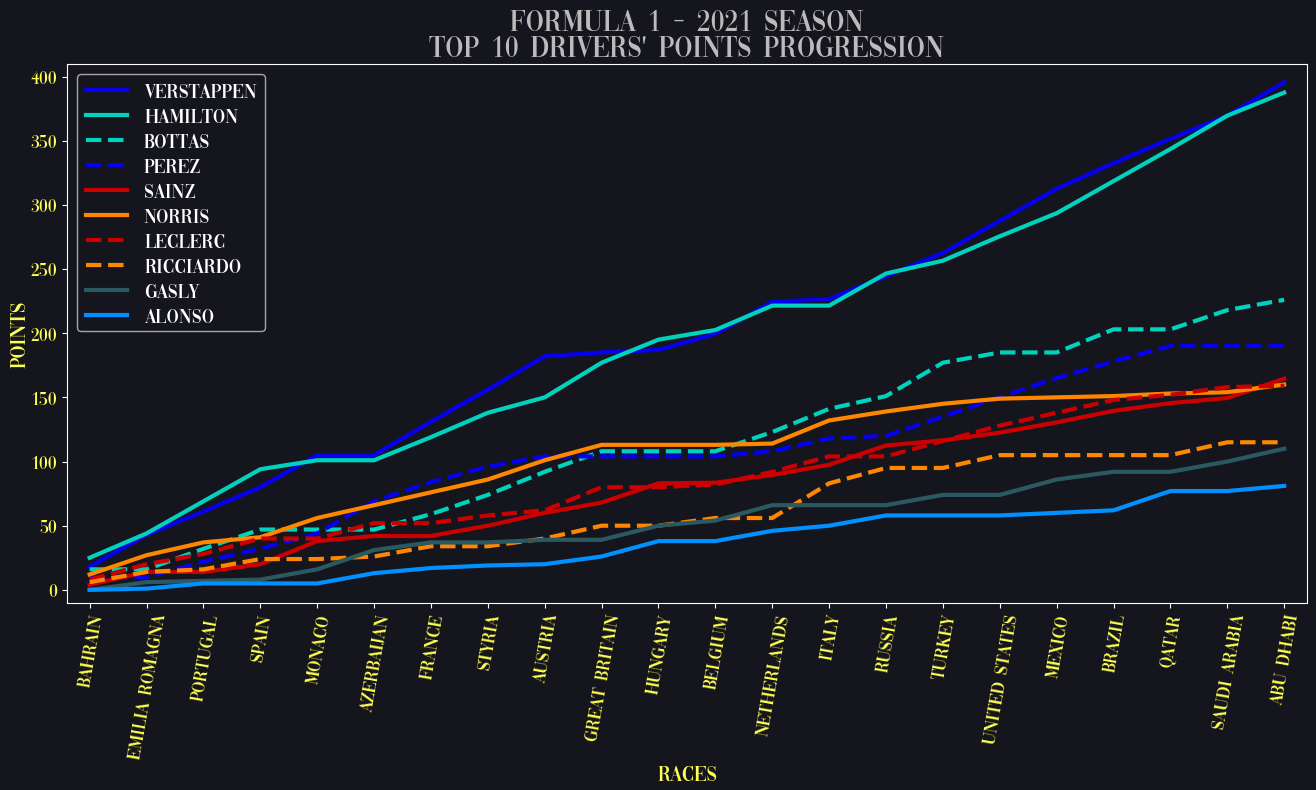

In [46]:
tracks = raceResults['Track'].unique()
#plt.style.use('seaborn')
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#15151d'
plt.rcParams['figure.facecolor'] = '#15151d'
plt.rcParams['grid.color'] = '#444444'
top10 = driverPts['Driver'].values[:10]
c = assign_color("drivers", top10)
plt.figure(figsize=(16,7))
plt.axis([-0.4, 21.4, -10, 410])
for i in range(len(top10)):
    ls = '-'
    pts = raceResults[raceResults['Driver'] == top10[i]]['Points'].values
    if top10[i] == "Max Verstappen":     pts[9] += 3;  pts[13] += 2;  pts[18] += 2
    elif top10[i] == "Lewis Hamilton":   pts[9] += 2;
    elif top10[i] == "Valtteri Bottas":  pts[9] += 1;  pts[13] += 3;  pts[18] += 3;  ls = '--';
    elif top10[i] == "Daniel Ricciardo":  pts[13] += 1;  ls = '--';
    elif top10[i] == "Carlos Sainz":     pts[18] += 1;
    elif top10[i] == "Sergio Perez" or top10[i] == "Charles Leclerc":  ls = '--'
    plt.plot(np.cumsum(pts), linewidth=3, label=top10[i].split()[1], color=c[i], linestyle=ls)
plt.title("Formula 1 - 2021 Season\nTop 10 Drivers' Points Progression", color='#bbbbbb', fontsize=22, fontweight='bold')
plt.legend(fontsize=15)
plt.xlabel('RACES', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(range(0,len(tracks)), tracks, fontsize=14, color='#ffff55', rotation=80)
plt.ylabel('POINTS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=14, color='#ffff55')
plt.show()

Yeah, we can definitely say that both **Verstappen** and **Hamilton** were in **another league**! Can you see how the gap was getting increased against the rest of the drivers after each race? Moreover, the graphic tells us sometimes Hamilton was the leading the championship, sometimes Verstappen (plus, no other drivers!); and in terms of height (points), we see the blue solid line being higher than the other.

Hopefully, this gives a clear picture of how these drivers proceeded in the whole season as the standings continuously changed race after race.

**To make it even more explanatory for the rivalry between Verstappen and Hamilton, there's another visualization below to show the points gap and which driver was in favor for the championship:**

C:\Users\myloc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


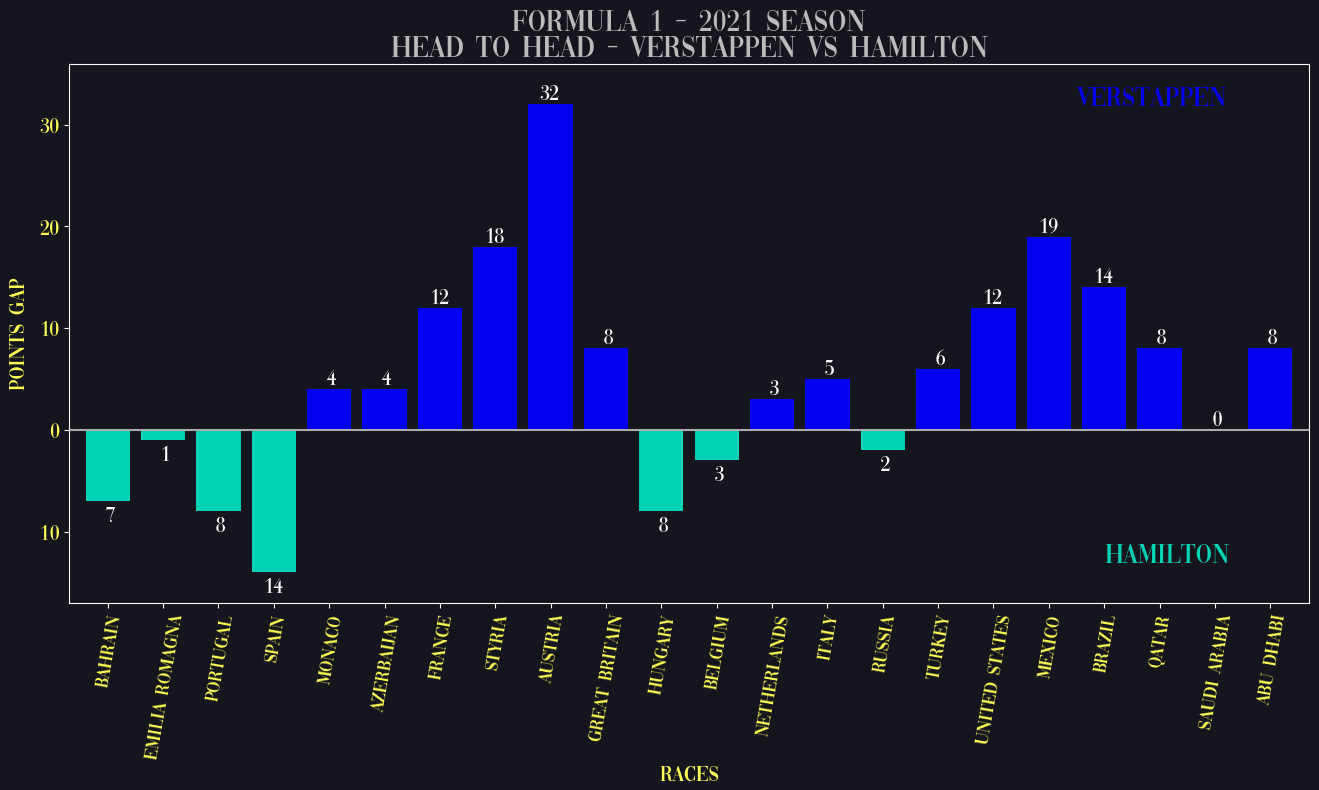

In [48]:
verPts = raceResults[raceResults['Driver'] == 'Max Verstappen']['Points'].values
verPts[9] += 3;  verPts[13] += 2;  verPts[18] += 2
hamPts = raceResults[raceResults['Driver'] == 'Lewis Hamilton']['Points'].values
hamPts[9] += 2
pointsGap = np.cumsum(verPts) - np.cumsum(hamPts)
c = []
for i in range(len(pointsGap)):
    if pointsGap[i] >= 0:   c.append('#0600f0')
    else:    c.append('#00d2b5')
plt.figure(figsize=(16,7))
plt.axis([-0.7, 21.7, min(pointsGap)-3, max(pointsGap)+4])
plt.bar(tracks, pointsGap, color=c)
for i in range(len(pointsGap)):
    if pointsGap[i] >= 0:   vsh = 0.5
    else:   vsh = -2
    plt.text(i-0.2, pointsGap[i]+vsh, "{:2}".format(int(abs(pointsGap[i]))), fontsize=16)
plt.axhline(0, color='#aaaaaa')
plt.text(17.5, 32, "VERSTAPPEN", color="#0600f0", fontsize=20, fontweight='bold')
plt.text(18, -13, "HAMILTON", color="#00d2b5", fontsize=20, fontweight='bold')
plt.title("Formula 1 - 2021 Season\nHead to Head - Verstappen vs Hamilton", color='#bbbbbb', 
          fontsize=22, fontweight='bold')
plt.xlabel('RACES', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(range(0,len(tracks)), tracks, fontsize=14, color='#ffff55', rotation=80)
plt.ylabel('POINTS GAP', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=16, color='#ffff55')
plt.show()

**That's the exact one we'd like to see! This explains the whole story of the biggest two rivals in 2021 Season!**

Here, in the first 4 races, Hamilton was leading. After Monaco, Verstappen has taken the championship lead (he experienced that for the first time in his career) and even extended the gap **by up to 32 points** after Austria GP!

Later, the Briton again took the lead once more in Hungary, and continued in Belgium. Then, the needle changed into Verstappen's direction for Netherlands and Italy (Monza). Next, Hamilton grabbed that back in Russia with only 2-points gap.

From Turkey to Qatar GP, the Dutchman was in favor for the title. After Saudi Arabia, it is unbelievable to see that the points of these two rivals have been equalized! So, the node of the championship would be solved in the last race, Abu Dhabi. As everyone knows, it was ended with Verstappen being the champion of 2021.

_To be honest, we've never lived such a battle that could last till the end of a season for a long time in Formula 1 history. Surely, year 2021 will be remembered as one of the epic seasons..._

## 2021 Season - Constructor Standings

Now, let's discuss how the constructor standings has been resulted in 2021 Season:

In [51]:
teamPts = raceResults.groupby('Team')['Points'].sum()
sprintQualiTeamPts = sprintQualiResults.groupby('Team')['Points'].sum()
teamPts = (teamPts+sprintQualiTeamPts).sort_values(ascending=False).reset_index()
teamPts.index = [i for i in range(1,11)]
teamPts

,Team,Points
1,Mercedes,613.5
2,Red Bull Racing Honda,585.5
3,Ferrari,323.5
4,McLaren Mercedes,275.0
5,Alpine Renault,155.0
6,AlphaTauri Honda,142.0
7,Aston Martin Mercedes,77.0
8,Williams Mercedes,23.0
9,Alfa Romeo Racing Ferrari,13.0
10,Haas Ferrari,0.0


As seen from the table above, **Mercedes** secured their constructors' championship title once again. And, that's the **8th consecutive season**! In other words, since 2014, that is, since the beginning of the **1.6 litre turbo hybrid engine era**, no other teams have ever obtained that title, thus an extraordinary achievement for the German team! However, the same thing can not be said for drivers' standings this year, due to the incidents happened in Abu Dhabi, they handed over the title to Max Verstappen of **Red Bull Racing**. Of course, it is not surprising that the Austrian team became the runner-up in this competitive season.

For the **3rd place**, we've witnessed good battles between **Ferrari** and **McLaren**, but at the end, the iconic Italian team deserved to come behind the top two teams.

A similar competitive has also been seen between **Alpine** and **AlphaTauri** for **5th place**. As a result, the Renault-powered French team got ahead of their rivals of mid-pack.

About **Aston Martin** (with the re-brand from Racing Point), they seemed to guarantee the **7th place**, as there are large point gaps against the teams of one place above and below.

After two and a half years, we've finally seen **Williams** scoring points in several races, hence they got rid of being the last team, even surpassing **Alfa Romeo**.

**Haas** was the only team completing the season as pointless! The reason might be because they almost never invested development for their cars and planned to transfer everything for the next season. It was a kind of season in vain!

## 2021 Season - Sprint Qualifying Results & Points

Sprint Qualifying is the newest feature introduced in F1 2021 Season.

In the race weekends where this format is available on Saturday, a total of **two** practice sessions are held (one each on Friday and Saturday) and drivers are placed at the grid for Sprint Qualifying according to **the results obtained on Friday qualifying session**. The race distance is set to **at least 100 kilometres** and there are **no mandatory pit-stops**. That is, it's just pure racing which lasts roughly **one third** of the time compared to regular race session! Lastly, the result of the Sprint Qualifying constitutes the starting grid of the race session on Sunday and the driver finished in the 1st place is awarded with **pole position**!

The purpose of bringing this qualifying format is to let the drivers struggle **for gaining positions** against opponents and **mix the grid altogether** before the main race. When the sprint ends, no trophy is given to the drivers finishing in top 3, only medals for their success and **3**, **2** and **1** points, respectively.

If Sprint Qualifying is found to be successful by the drivers and teams, as well as FIA, then it can be sustained for the next seasons and more race weekends might contain this session.

**Below you can see the top 10 results of the Sprint Qualifying sessions that were held in only three different race weekends in 2021:**

### Great Britain

In [56]:
sprintQualiResults[sprintQualiResults['Track'] == 'Great Britain'].set_index('Position').head(10)

,Track,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,,
1,Great Britain,33,Max Verstappen,Red Bull Racing Honda,2,17,25:38.426,3
2,Great Britain,44,Lewis Hamilton,Mercedes,1,17,+1.430,2
3,Great Britain,77,Valtteri Bottas,Mercedes,3,17,+7.502,1
4,Great Britain,16,Charles Leclerc,Ferrari,4,17,+11.278,0
5,Great Britain,4,Lando Norris,McLaren Mercedes,6,17,+24.111,0
6,Great Britain,3,Daniel Ricciardo,McLaren Mercedes,7,17,+30.959,0
7,Great Britain,14,Fernando Alonso,Alpine Renault,11,17,+43.527,0
8,Great Britain,5,Sebastian Vettel,Aston Martin Mercedes,10,17,+44.439,0
9,Great Britain,63,George Russell,Williams Mercedes,8,17,+46.652,0


### Italy (Monza)

In [58]:
sprintQualiResults[sprintQualiResults['Track'] == 'Italy'].set_index('Position').head(10)

,Track,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,,
1,Italy,77,Valtteri Bottas,Mercedes,1,18,27:54.078,3
2,Italy,33,Max Verstappen,Red Bull Racing Honda,3,18,+2.325,2
3,Italy,3,Daniel Ricciardo,McLaren Mercedes,5,18,+14.534,1
4,Italy,4,Lando Norris,McLaren Mercedes,4,18,+18.835,0
5,Italy,44,Lewis Hamilton,Mercedes,2,18,+20.011,0
6,Italy,16,Charles Leclerc,Ferrari,8,18,+23.442,0
7,Italy,55,Carlos Sainz,Ferrari,7,18,+27.952,0
8,Italy,99,Antonio Giovinazzi,Alfa Romeo Racing Ferrari,10,18,+31.089,0
9,Italy,11,Sergio Perez,Red Bull Racing Honda,9,18,+31.680,0


### Brazil

In [60]:
sprintQualiResults[sprintQualiResults['Track'] == 'Brazil'].set_index('Position').head(10)

,Track,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,,
1,Brazil,77,Valtteri Bottas,Mercedes,2,24,29:09.559,3
2,Brazil,33,Max Verstappen,Red Bull Racing Honda,1,24,+1.170,2
3,Brazil,55,Carlos Sainz,Ferrari,5,24,+18.723,1
4,Brazil,11,Sergio Perez,Red Bull Racing Honda,3,24,+19.787,0
5,Brazil,44,Lewis Hamilton,Mercedes,20,24,+20.872,0
6,Brazil,4,Lando Norris,McLaren Mercedes,7,24,+22.858,0
7,Brazil,16,Charles Leclerc,Ferrari,6,24,+25.056,0
8,Brazil,10,Pierre Gasly,AlphaTauri Honda,4,24,+34.158,0
9,Brazil,31,Esteban Ocon,Alpine Renault,10,24,+34.632,0


According to the results of Sprint Qualifying sessions above, **Valtteri Bottas** finished 1st twice, and **Max Verstappen**, once.

Of course, we can definitely state that several drivers succedded to **gain some positions**, also the others lost a few. Thus, it seems this format is operating well enough for mixing the grid for the next day.

Perhaps, the moment which attracted the most attention was from **Lewis Hamilton** in Brazil, where the Mercedes driver started the sprint from last **(P20)** and quickly climbed up the positions in the 24-lap race and consequently, he finished **5th**! Showing this performance was very important for Hamilton in order to keep the competition for championship title alive against Verstappen, but after the sprint, it was ended with **5-place grid penalty** for the main race by the use of additional power unit element.

### Total Points Earned in Sprint Qualifying

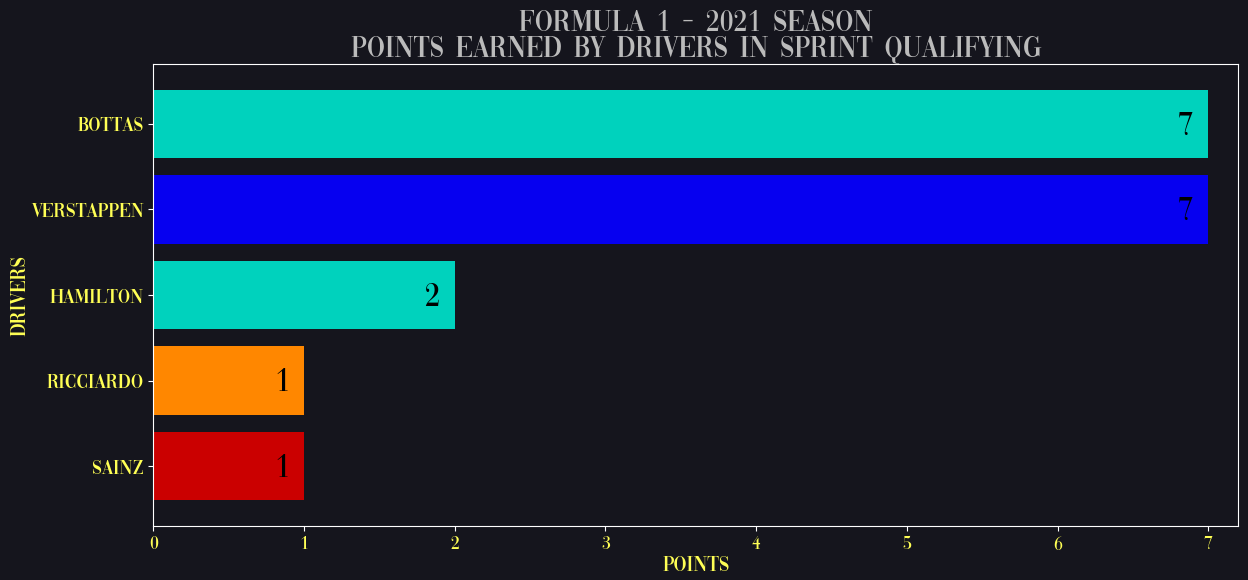

In [63]:
sprintQualiDriver = sprintQualiResults.groupby(['Driver', 'Team'])['Points'].sum().sort_values(ascending=False)
sprintQualiDriver = sprintQualiDriver[sprintQualiDriver > 0].reset_index()
sprintQualiDriver.index = [i for i in range(1,6)]
c = assign_color("drivers", sprintQualiDriver['Driver'])
surnames = [driver.split()[1] for driver in sprintQualiDriver['Driver']]
plt.figure(figsize=(14,6))
plt.axis([0,7.2,4.7,-0.7])
plt.barh(surnames, sprintQualiDriver['Points'], color=c)
for i in range(1,len(sprintQualiDriver)+1):
    plt.text(sprintQualiDriver['Points'][i]-0.2, i-0.88, sprintQualiDriver['Points'][i], fontsize=24, color='k')
plt.title("Formula 1 - 2021 Season\nPoints Earned by Drivers in Sprint Qualifying", 
          fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('POINTS', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=15, color='#ffff55')
plt.show()

From the visualization above, **only 5 drivers** benefited from Sprint Qualifying sessions. **Bottas** and **Verstappen** earned equally **7 points** and Hamilton was able to obtain only 2 points (came from Great Britain GP). Ricciardo and Sainz were the other drivers with points, but limited to 1 single point to contribute to their standings.

## Race Winners

Here comes the winners of all races of the 2021 Season calendar!

Please take your time to inspect the table below as well as the other beneficial information...

In [66]:
raceWinners = raceResults[raceResults['Position'] == '1'].set_index('Track').drop('Position', axis=1)
raceWinners

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Track,,,,,,,,,
Bahrain,44,Lewis Hamilton,Mercedes,2.0,56,1:32:03.897,25.0,No,1:34.015
Emilia Romagna,33,Max Verstappen,Red Bull Racing Honda,2.0,63,2:02:34.598,25.0,No,1:17.524
Portugal,44,Lewis Hamilton,Mercedes,2.0,66,1:34:31.421,25.0,No,1:20.933
Spain,44,Lewis Hamilton,Mercedes,1.0,66,1:33:07.680,25.0,No,1:20.665
Monaco,33,Max Verstappen,Red Bull Racing Honda,2.0,78,1:38:56.820,25.0,No,1:14.649
Azerbaijan,11,Sergio Perez,Red Bull Racing Honda,6.0,51,2:13:36.410,25.0,No,1:44.687
France,33,Max Verstappen,Red Bull Racing Honda,1.0,53,1:27:25.770,26.0,Yes,1:36.404
Styria,33,Max Verstappen,Red Bull Racing Honda,1.0,71,1:22:18.925,25.0,No,1:08.017
Austria,33,Max Verstappen,Red Bull Racing Honda,1.0,71,1:23:54.543,26.0,Yes,1:06.200


Here, we can say that most of these races this season have been won by **starting at the front row**.

On the other hand, there were other races where the driver began the races far from the front row and achieved to claim the race wins! The most remarkable ones were **Ocon** in Hungary GP, where the Frenchman started P8; and **Hamilton** in Brazil GP, where he started the race in 10th place.

To better illustrate this, let's make **a bar chart to count the race wins by drivers** in 2021 Season:

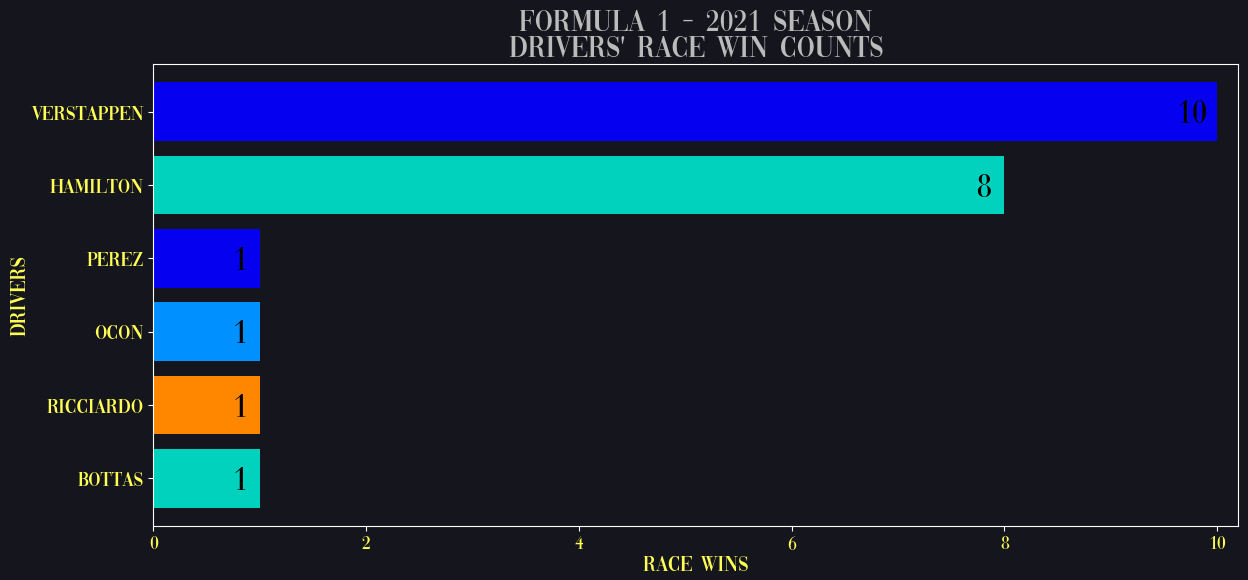

In [68]:
raceWinnersCnt = raceWinners['Driver'].value_counts()
c = assign_color("drivers", raceWinnersCnt.index)
surnames = [driver.split()[1] for driver in raceWinnersCnt.index]
plt.figure(figsize=(14,6))
plt.axis([0,10.2,5.65,-0.65])
plt.barh(surnames, raceWinnersCnt.values, color=c)
for i in range(len(raceWinnersCnt)):
    plt.text(raceWinnersCnt.values[i]-0.5, i+0.15, "{:3}".format(raceWinnersCnt.values[i]), fontsize=24, color='k')
plt.title("Formula 1 - 2021 Season\nDrivers' Race Win Counts", fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('RACE WINS', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=15, color='#ffff55')
plt.show()

So, in all these 22-race long season, there were total of **6 drivers** who saw the chequered flag in the 1st place! It is clear to state that the two closest rivals **Verstappen** and **Hamilton** occupied the first two places in the chart above, with the numbers **10** and **8**, respectively.

The rest, **Ocon**, **Perez**, **Bottas** and **Ricciardo** also have won races **once** this season.

Remember that **Hungarian GP** was Ocon's first grand prix win he had in his career. Likewise, Perez achieved to score his **second F1 win** in Azerbaijan after incidents in the last few laps.

For Bottas, his win only came from Turkey, and **stayed significantly behind** Hamilton in terms of race win counts. Well, on the positive side, he did not finish the season without a win, though.

Last but not least, Ricciardo enjoyed the victory in Italy (Monza) and this was **his first in McLaren team** if we consider his wins he had from Red Bull Racing.

## Pole Positions

Qualifying session on Saturday (for some race weekends, with Sprint Qualifying) is **crucial** for drivers and teams to show what they've got to be the fastest and take **the pole position**, thus earning the advantage to start the race ahead of all rivals!

The table below shows us the polesitters of all races this season, and, in the meantime, the focus point is **how these drivers finished their races** after starting from pole:

In [71]:
polePos = raceResults[raceResults['Starting Grid'] == 1].set_index('Track').drop('Starting Grid', axis=1)
polePos

,Position,No,Driver,Team,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Track,,,,,,,,,
Bahrain,2,33,Max Verstappen,Red Bull Racing Honda,56,+0.745,18.0,No,1:33.228
Emilia Romagna,2,44,Lewis Hamilton,Mercedes,63,+22.000,19.0,Yes,1:16.702
Portugal,3,77,Valtteri Bottas,Mercedes,66,+33.530,16.0,Yes,1:19.865
Spain,1,44,Lewis Hamilton,Mercedes,66,1:33:07.680,25.0,No,1:20.665
Monaco,NC,16,Charles Leclerc,Ferrari,0,DNS,0.0,No,NaN
Azerbaijan,4,16,Charles Leclerc,Ferrari,51,+3.828,12.0,No,1:45.382
France,1,33,Max Verstappen,Red Bull Racing Honda,53,1:27:25.770,26.0,Yes,1:36.404
Styria,1,33,Max Verstappen,Red Bull Racing Honda,71,1:22:18.925,25.0,No,1:08.017
Austria,1,33,Max Verstappen,Red Bull Racing Honda,71,1:23:54.543,26.0,Yes,1:06.200


**From this table, we can take these outcomes:**
* In **11** different tracks, the driver, who started from the pole position, won the race. Among those, **Max Verstappen** accomplished it a total of **7 times**. His close rival, **Lewis Hamilton** did this **3 times**. The remaining one came from **Bottas** (in Turkey).
* In **3** different tracks, the polesitters failed to finish the races, especially the one where **Leclerc** could not participate in the grid, in his home race, **Monaco**! The other two came from **Verstappen**; in **Great Britain GP**, he clashed with **Hamilton** in the first lap and hit the barriers with very high G-force; and in **Italy** (as mentioned above), he again made contact the Briton, ending in DNF for both drivers.
* The drivers starting at 1st position also set the fastest lap time, in **8** different tracks. Among **the five of them**, this was clinched with race wins, where we can see Verstappen's name in those **three** times.

Together with that, the visualization below will help us count the total pole positions obtained by drivers in 2021:

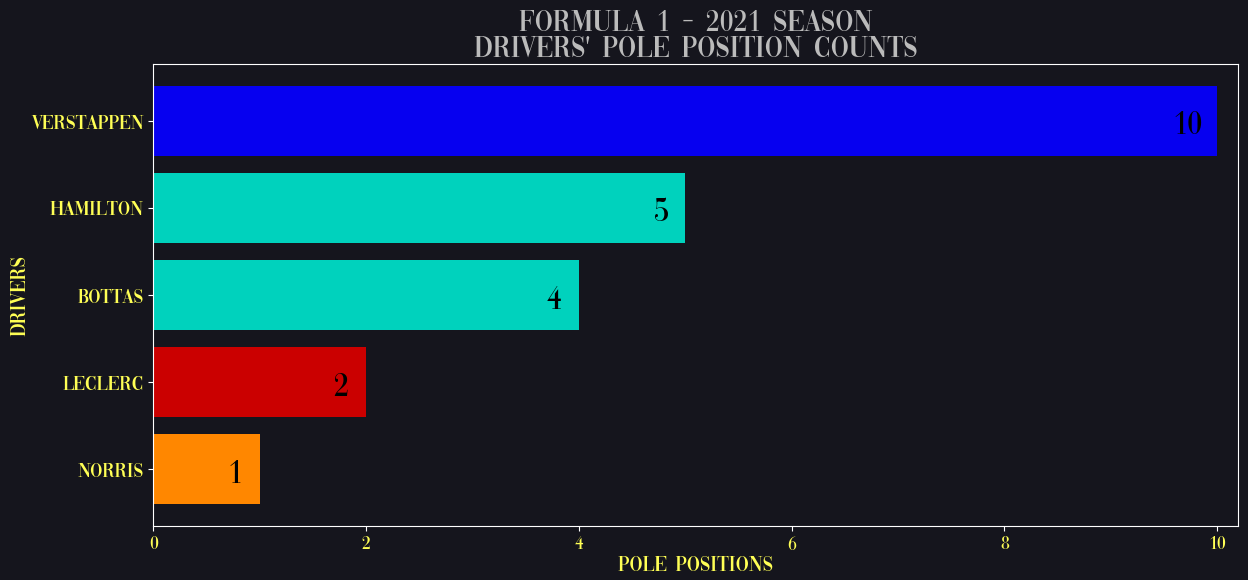

In [73]:
polePosCnt = polePos['Driver'].value_counts()
c = assign_color("drivers", polePosCnt.index)
plt.figure(figsize=(14,6))
plt.axis([0,10.2,4.65,-0.65])
plt.barh([driver.split()[1] for driver in polePosCnt.index], polePosCnt.values, color=c)
for i in range(len(polePosCnt)):
    plt.text(polePosCnt.values[i]-0.42, i+0.15, "{:2}".format(polePosCnt.values[i]), fontsize=24, color='k')
plt.title("Formula 1 - 2021 Season\nDrivers' Pole Position Counts", fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('POLE POSITIONS', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=15, color='#ffff55')
plt.show()

Here, this season's champion Verstappen took the pole position **10 times**, which was **more than twice the amount** of Mercedes drivers!

Leclerc (2) and Norris (1) were the other drivers who were not from Red Bull and Mercedes, to earn the right of starting 1st in the race sessions.

Note that for this season, we could not see Leclerc to start in Monaco, as explained above! Additionally, in Russia, Norris achieved to start **on pole for the first time in his career**!

## Podium Finishes

Besides winning races, finishing in top 3 places and **stepping on the podium** after the race is a great glory for drivers and making their team proud! Its value is immensely high if the driver did not achieve that before or had only a few in his long-lasting career.

Let's see the drivers who successfully were on the podium and count the number of trophies they earned, in 2021 Season:

In [76]:
podiumFinish = raceResults[raceResults['Position'].isin(['1','2','3'])].set_index('Track').drop('Position', axis=1)

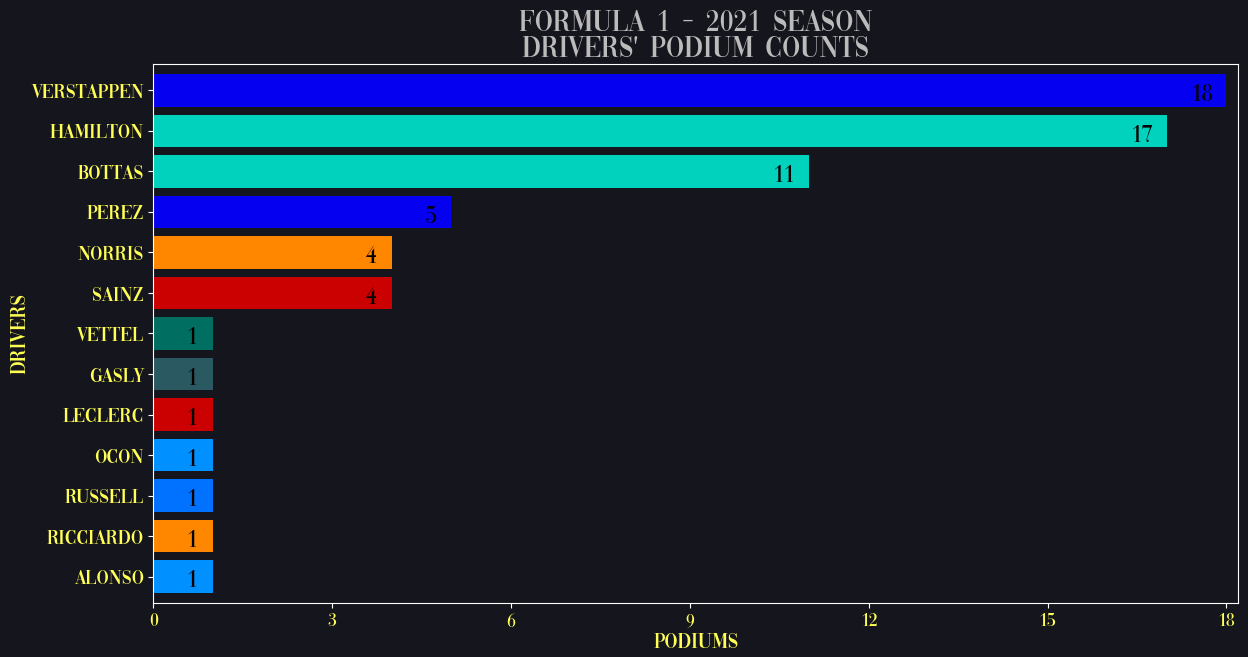

In [77]:
podiumCnt = podiumFinish['Driver'].value_counts()
c = assign_color("drivers", podiumCnt.index)
plt.figure(figsize=(14,7))
plt.axis([0,18.2,12.65,-0.65])
plt.barh([driver.split()[1] for driver in podiumCnt.index], podiumCnt.values, color=c)
for i in range(len(podiumCnt)):
    plt.text(podiumCnt.values[i]-0.6, i+0.25, "{:2}".format(podiumCnt.values[i]), fontsize=18, color='k')
plt.title("Formula 1 - 2021 Season\nDrivers' Podium Counts", fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('PODIUMS', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(range(0,20,3), fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=15, color='#ffff55')
plt.show()

Well, it is certain that **Verstappen** and **Hamilton** dominated the count of podium finishes this season, with **18** and **17**, respectively! Their teammates **Bottas** and **Perez** came after them with numbers **11** and **5**.

**Norris** and **Sainz** were the other drivers (4) who successfully scored **more than one podium finishes** in 2021.

Moreover, **Gasly**, **Ricciardo**, **Ocon**, **Leclerc**, **Russell**, **Alonso** and **Vettel** were the remaining drivers joining the podium ceremony **once** this season.

All in all, 2021 Season has seen **13 different drivers** stepping on the podium in all races!

Also note that, it was **George Russell**'s first podium he achieved in his F1 career (which occurred in Belgium, mentioned above). Plus, it was great to see the two-times world champion **Fernando Alonso** back on the podium in **Qatar** (his 98th in total)!

## Top 10 Finishes

Now, let's take a much broader angle by counting **the top 10 finishes** by all drivers throughout the season (i.e. how many times each driver **scored points** in all races):

In [80]:
topTen = [str(i) for i in range(1,11)]
topTenFinish = raceResults[raceResults['Position'].isin(topTen)]

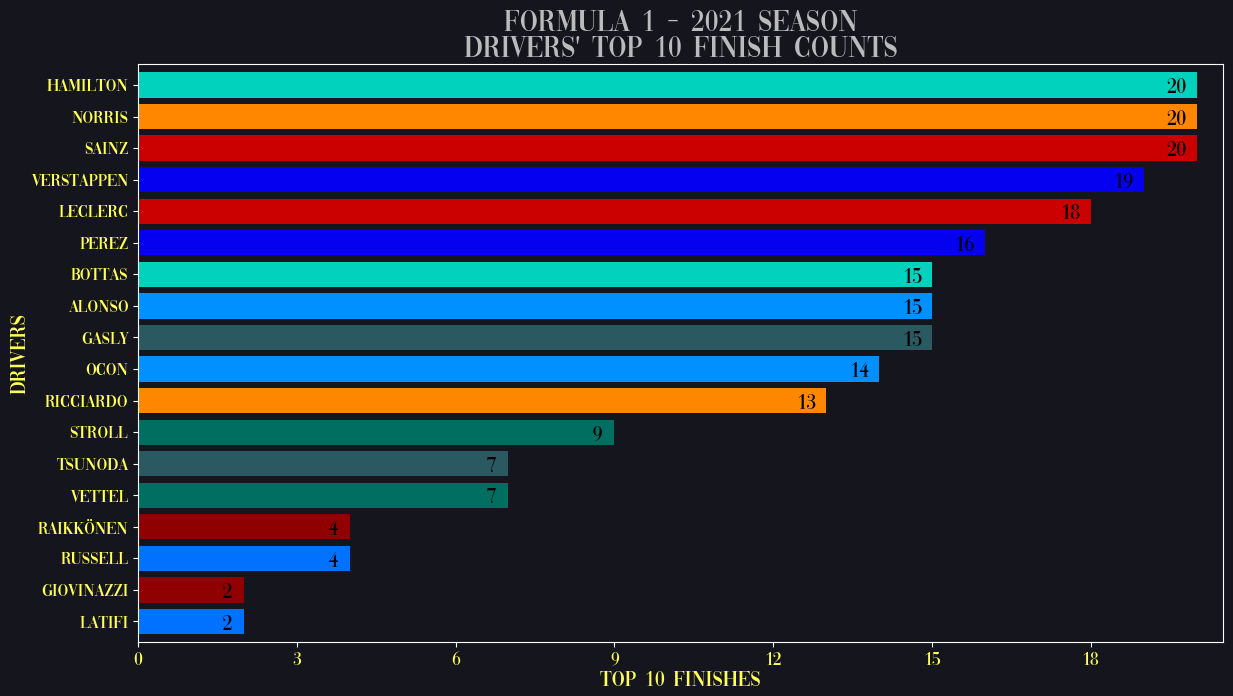

In [81]:
topTenFinishCnt = topTenFinish['Driver'].value_counts()
c = assign_color("drivers", topTenFinishCnt.index)
plt.figure(figsize=(14,7.5))
plt.axis([0,20.5,17.65,-0.65])
plt.barh([driver.split()[1] for driver in topTenFinishCnt.index], topTenFinishCnt.values, color=c)
for i in range(len(topTenFinishCnt)):
    plt.text(topTenFinishCnt.values[i]-0.57, i+0.26, "{:2}".format(topTenFinishCnt.values[i]), fontsize=16, color='k')
plt.title("Formula 1 - 2021 Season\nDrivers' Top 10 Finish Counts", fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('TOP 10 FINISHES', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(range(0,20,3), fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=13, color='#ffff55')
plt.show()

Whoa, **Hamilton**, **Norris** and **Sainz** together were the most point scorers in different tracks this season, with a total of **20**! **Verstappen** followed the trio with **19**. His teammate **Perez** finished in the top 10 by **16** times. And, **Leclerc** got sandwiched between the Red Bull drivers with **18**.

Looking at the bottom, **Williams** and **Alfa Romeo** drivers had the least top 10 finishes with mutually **4** and **2** times.

What about **Haas** drivers? Well, with no doubt, we've never seen **Mick Schumacher** and **Nikita Mazepin** scoring points in the whole season; that's why, they are not shown in the chart above.

## +1 Point from Fastest Laps

Since 2019 Season, any driver who set **the fastest lap time** in the race session is awarded with **1 additional point**. In many races, the importance of this point is high as the driver and his team attempts to steal it from their opponents by, for instance, **entering the pit and getting the soft tyres** if there is enough gap against the driver behind, then doing his best to be the fastest on the track! At the end, this might have a substantial effect on drivers' and constructors' standings.

In the table below, you see the drivers who set the fastest laps in different tracks of 2021 Season and claimed the +1 point. However, some tracks are not listed because in order to get the point, the driver must also **finish in the top 10**.

In [84]:
onePtByFastestLaps = raceResults[raceResults['+1 Pt'] == 'Yes'].set_index('Track').drop('+1 Pt', axis=1)
onePtByFastestLaps

,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Fastest Lap
Track,,,,,,,,,
Bahrain,3,77,Valtteri Bottas,Mercedes,3.0,56,+37.383,16.0,1:32.090
Emilia Romagna,2,44,Lewis Hamilton,Mercedes,1.0,63,+22.000,19.0,1:16.702
Portugal,3,77,Valtteri Bottas,Mercedes,1.0,66,+33.530,16.0,1:19.865
Spain,2,33,Max Verstappen,Red Bull Racing Honda,2.0,66,+15.841,19.0,1:18.149
Monaco,7,44,Lewis Hamilton,Mercedes,7.0,78,+68.231,7.0,1:12.909
France,1,33,Max Verstappen,Red Bull Racing Honda,1.0,53,1:27:25.770,26.0,1:36.404
Styria,2,44,Lewis Hamilton,Mercedes,2.0,71,+35.743,19.0,1:07.058
Austria,1,33,Max Verstappen,Red Bull Racing Honda,1.0,71,1:23:54.543,26.0,1:06.200
Hungary,5,10,Pierre Gasly,AlphaTauri Honda,5.0,70,+63.614,11.0,1:18.394


From this table, we can say that total of **18 points** were distributed to drivers by setting the fastest laps in different tracks. Furthermore, the locations with no +1 point given are **Azerbaijan**, **Great Britain**, **Belgium** and **Mexico**.

Another knowledge we can have is that there are **5 tracks** where the driver started the race in pole position and won with the fastest lap time (that's 26 points maximum). **Verstappen** achieved this **three times** (in Spain, France and Abu Dhabi), whereas **Hamilton** and **Bottas** did this **once** (in Saudi Arabia and Turkey, respectively).

**Ricciardo** is the only driver who won with the +1 point without starting from pole, occurred in Italy (Monza).

The visualization chart below will clearly state **the different drivers** setting the fastest lap this season, along with their counts:

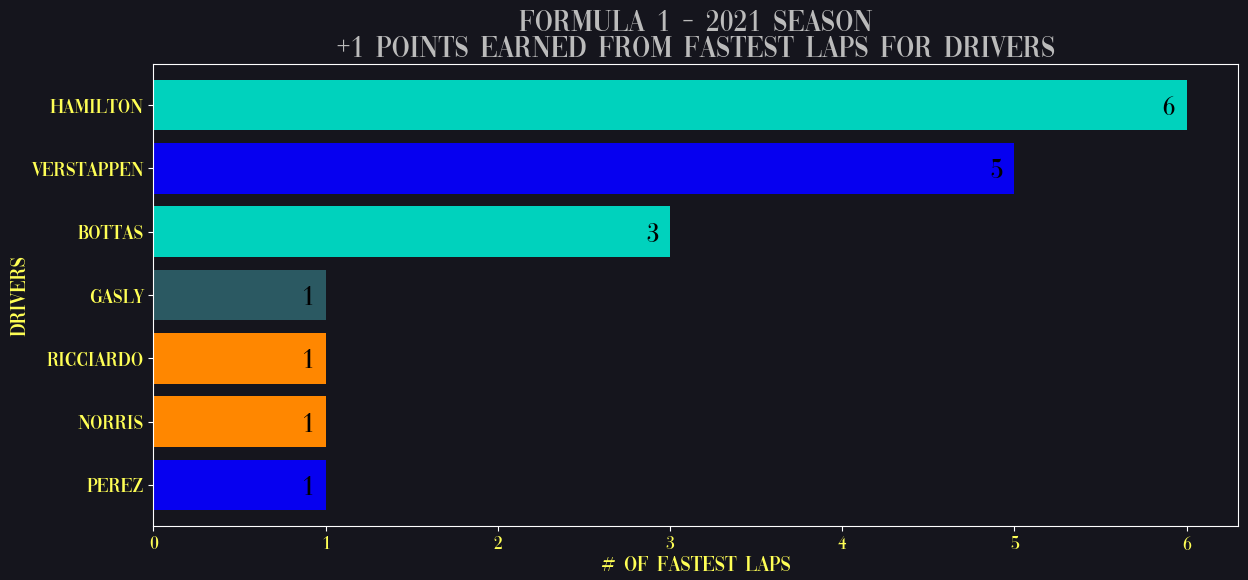

In [87]:
onePtFLCnt = onePtByFastestLaps['Driver'].value_counts()
c = assign_color("drivers", onePtFLCnt.index)
plt.figure(figsize=(14,6))
plt.axis([0,6.3,6.65,-0.65])
plt.barh([driver.split()[1] for driver in onePtFLCnt.index], onePtFLCnt.values, color=c)
for i in range(len(onePtFLCnt)):
    plt.text(onePtFLCnt.values[i]-0.2, i+0.15, "{:2}".format(onePtFLCnt.values[i]), fontsize=20, color='k')
plt.title("Formula 1 - 2021 Season\n+1 Points Earned from Fastest Laps for Drivers", 
          fontsize=22, fontweight="bold", color="#bbbbbb")
plt.xlabel('# OF FASTEST LAPS', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=15, color='#ffff55')
plt.show()

Here, **Hamilton** has claimed **6** additional points by setting the fastest laps in race sessions, and his biggest rival **Verstappen** got this a total of **5** this season. We can see the Briton's teammate **Bottas** is coming after them with **3**.

In addition, **Ricciardo**, **Norris**, **Gasly** and **Perez** received these +1 points once this season and added "the fastest driver" achievements to their careers.

## DNF Analyses

Every F1 driver wants to see **the chequered flag** and finish the races after a long time of driving. However, since this is motorsport racing, anything unexpected could happen while racing such as **driver mistakes** (e.g. contact with rivals, spinning out, hitting the wall) or **mechanical issues** (e.g. engine failure, gearbox issue, oil leakage), resulting in DNF! The distressing thing is that it could badly affect both drivers' and constructors' standings through the season.

### Drivers

Here, traditionally, it is inevitable to see many drivers to not complete some races due to aforementioned reasons in 2021 Season. Let's take a look at the visualization below to observe **the counts of DNFs by drivers**:

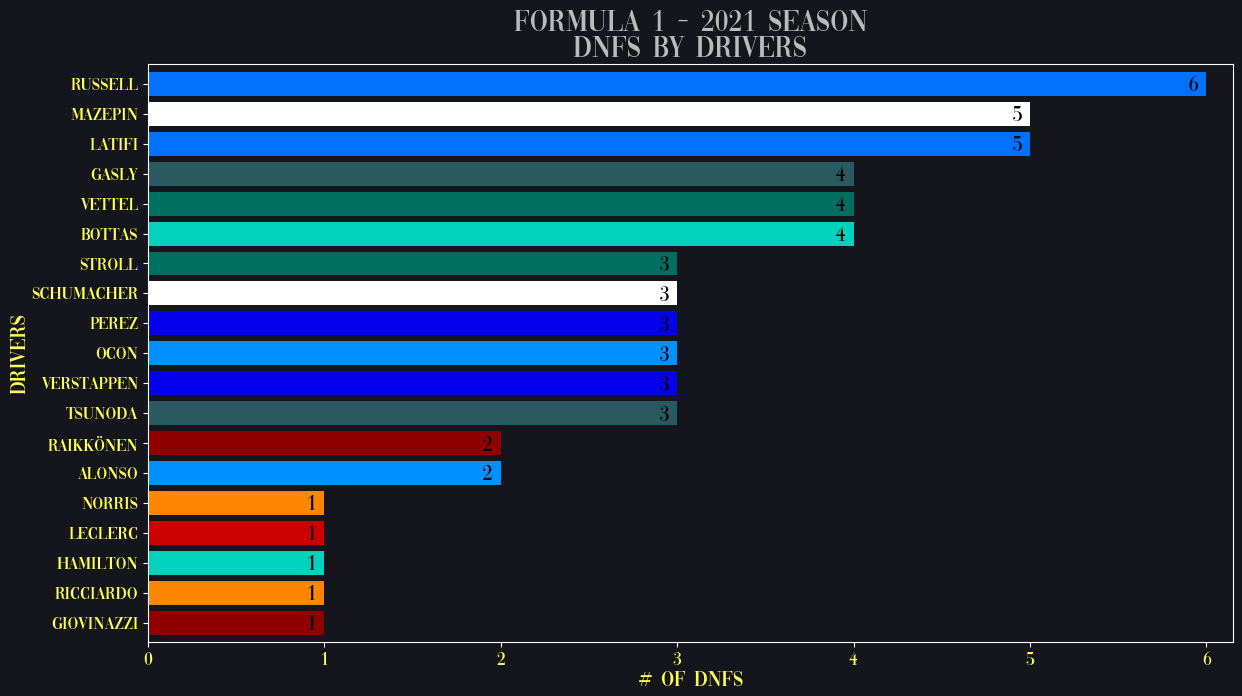

In [91]:
dnfResultsDriver = raceResults[raceResults['Time/Retired'] == 'DNF']['Driver'].value_counts()
c = assign_color("drivers", dnfResultsDriver.index)
plt.figure(figsize=(14,7.5))
plt.axis([0,6.15,18.65,-0.65])
plt.barh([driver.split()[1] for driver in dnfResultsDriver.index], dnfResultsDriver.values, color=c)
for i in range(len(dnfResultsDriver)):
    plt.text(dnfResultsDriver.values[i]-0.15, i+0.25, "{:2}".format(dnfResultsDriver.values[i]), fontsize=16, color='k')
plt.title("Formula 1 - 2021 Season\nDNFs by Drivers", fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF DNFs', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=13, color='#ffff55')
plt.show()

We can imply that **George Russell** had the most DNFs among all drivers in the whole season, which is **6**. Then, **Mazepin** and **Latifi** come after the British driver, with **5** DNFs.

After that, **Vettel**, **Gasly** and **Bottas** could not successfully see the finish line in **4** different races.

Our 2021 Season champion **Verstappen** did not take the chequered flag in **3** races, which is the same as his teammate **Perez**. If you wonder which races the Dutchman did not finish, these are **Azerbaijan**, **Great Britain** and **Italy (Monza)**.

His closest rival **Hamilton** experienced only a **single** DNF in 2021; that was from, as you expected, the collision he had with Verstappen in **Italy(Monza)**.

Lastly, you notice that there is only one driver who did not show up in the bar chart above. Yep, this is **Carlos Sainz** from Ferrari, thus he is the only one completing all the races this season. What a great consistency!

### Teams

Of course, if we calculate all the DNF counts with regards to **teams**, then we'll have the result below:

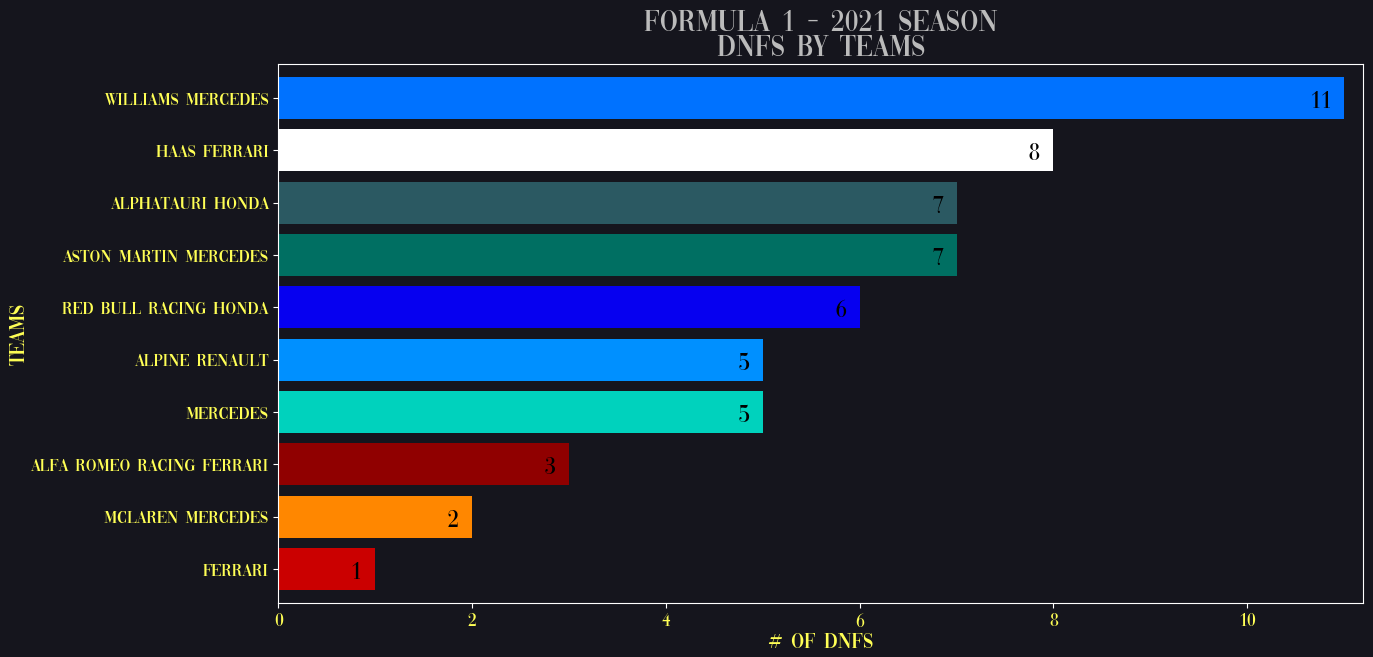

In [94]:
dnfResultsTeam = raceResults[raceResults['Time/Retired'] == 'DNF']['Team'].value_counts()
c = assign_color("teams", dnfResultsTeam.index)
plt.figure(figsize=(14,7))
plt.axis([0,11.2,9.65,-0.65])
plt.barh(dnfResultsTeam.index, dnfResultsTeam.values, color=c)
for i in range(len(dnfResultsTeam)):
    plt.text(dnfResultsTeam.values[i]-0.35, i+0.18, "{:2}".format(dnfResultsTeam.values[i]), fontsize=18, color='k')
plt.title("Formula 1 - 2021 Season\nDNFs by Teams", fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF DNFs', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(fontsize=14, color='#ffff55')
plt.ylabel('TEAMS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=13, color='#ffff55')
plt.show()

The graphic indicates that **Williams** had **11** DNFs in total, which is the highest among all the other teams!

**Haas** took the second place with 8 DNFs, then **AlphaTauri** and **Aston Martin** shared the third place for not having their cars seen the finish line with a total of **7** DNFs.

It may not be surprising that **Scuderia Ferrari** was the team with the least DNFs in the whole season, stayed at just **1 DNF**! As observed from the DNFs by drivers chart, **Charles Leclerc** got this DNF which occurred in **Hungarian Grand Prix**.

**There are other situations which are worthwhile to tell and should not be overlooked!...**

The worst of all is probably **not even starting the race** before the start time officially comes! Here, the table below shows that **three drivers** experienced that in **three different tracks**.

In this season, **Leclerc** did not start the race in **Monaco** (his home race actually, which was even more disappointing!) because of the gearbox issue found beforehand. That might have happened due to the crash he caused near the end of Q3 of qualifying session in that weekend and the damage was not fixed completely before the race.

Next, **Tsunoda** seemed to have major mechanical issues on his car before the race start on Sunday in **Italy (Monza)**. 

And, in Abu Dhabi, **Mazepin** was forced to withdraw from the grid due to being tested positive for Covid-19, ending the season earlier!

In [97]:
raceResults[raceResults['Time/Retired'] == 'DNS']

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
99,Monaco,NC,16,Charles Leclerc,Ferrari,1.0,0,DNS,0.0,No,NaN
279,Italy,NC,22,Yuki Tsunoda,AlphaTauri Honda,15.0,0,DNS,0.0,No,NaN
439,Abu Dhabi,NC,9,Nikita Mazepin,Haas Ferrari,20.0,0,DNS,0.0,No,NaN


**Here comes another one:** Any driver who did not finish a race can be still be classified in the results of the related race, provided that the driver has completed **more than 90%** of the race distance.

In the table below, we have **9 different driver and track combinations** for the situation here. If we take them individually, that's 7 different tracks and 6 different drivers...

In [99]:
raceResults.loc[(raceResults['Time/Retired'] == 'DNF') & (raceResults['Position'] != 'NC')]

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
16,Bahrain,17,10,Pierre Gasly,AlphaTauri Honda,5.0,52,DNF,0.0,No,1:34.090
17,Bahrain,18,6,Nicholas Latifi,Williams Mercedes,17.0,51,DNF,0.0,No,1:36.602
34,Emilia Romagna,15,5,Sebastian Vettel,Aston Martin Mercedes,13.0,61,DNF,0.0,No,1:19.074
116,Azerbaijan,17,63,George Russell,Williams Mercedes,15.0,48,DNF,0.0,No,1:45.959
117,Azerbaijan,18,33,Max Verstappen,Red Bull Racing Honda,3.0,45,DNF,0.0,No,1:44.481
176,Austria,17,5,Sebastian Vettel,Aston Martin Mercedes,11.0,69,DNF,0.0,No,1:08.420
256,Netherlands,17,63,George Russell,Williams Mercedes,11.0,69,DNF,0.0,No,1:15.628
298,Russia,19,6,Nicholas Latifi,Williams Mercedes,18.0,47,DNF,0.0,No,1:40.000
434,Abu Dhabi,15,11,Sergio Perez,Red Bull Racing Honda,4.0,55,DNF,0.0,No,1:26.419


## Total Laps and Distances Driven in Race Sessions

After many analyses we've inspected here, there are a few more things to see where you could find them interesting and informative.

Let's begin this part by calculating the **total laps driven for all drivers** raced throughout the season according to the data in race results... _(Note that, only full laps are considered)_

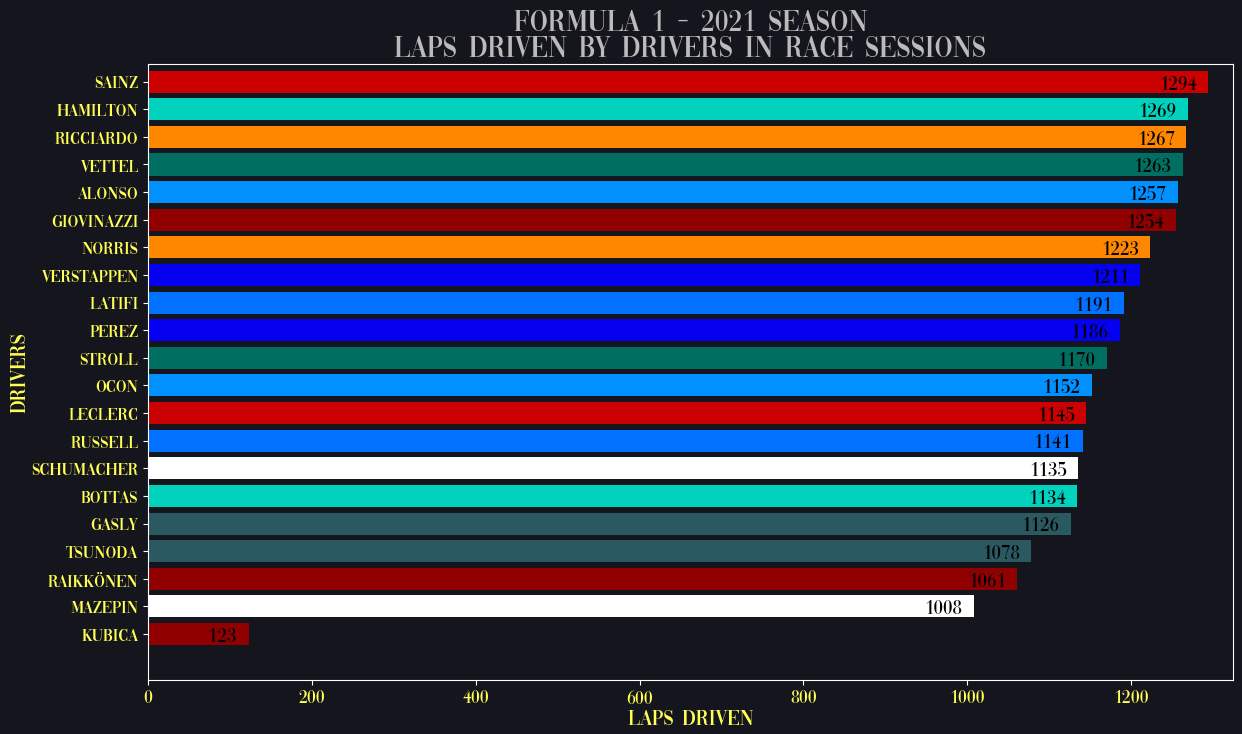

In [101]:
driversLaps = raceResults.groupby('Driver')['Laps'].sum().sort_values(ascending=False)
c = assign_color('drivers', driversLaps.index)
plt.figure(figsize=(14,8))
plt.axis([0, max(driversLaps.values)+30, 21.65, -0.65])
plt.barh([driver.split()[1] for driver in driversLaps.index], driversLaps.values, color=c)
plt.title("Formula 1 - 2021 Season\nLaps Driven by Drivers in Race Sessions", fontsize=22, fontweight='bold', color='#bbbbbb')
for i in range(len(driversLaps)):
    plt.text(driversLaps.values[i]-60, i+0.25, "{:4}".format(driversLaps.values[i]), fontsize=15, color='k')
plt.xlabel('LAPS DRIVEN', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=13, color='#ffff55')
plt.show()

Well, the visualization above reveals that **Carlos Sainz had the most laps driven** in 2021 Season! The major fact could be that he **never failed to finish any races**, hence the number is the highest among all, which should not be surprising...

Then, **Hamilton has come in the 2nd place** for total number of laps, but this did not help him obtain the world championship title against Verstappen, who has completed 1211 laps and the difference appeared to be **more than 50 laps**.

Taking to the bottom, it seems that Mazepin was the driver with **the least driven laps** (if we exclude Kubica), stayed **very slightly above 1000 laps**. Above the Russian, it's **Raikkönen** the Iceman but consider that he missed two races due to his positiveness of Covid-19.

Lastly, by adding the total laps of Raikkönen and Kubica, it will equal to **1184 laps**, which will place them between Perez and Stroll.

As we've seen the total laps driven for all drivers, can we do the same for **the teams** as we merge all the teammates' numbers?

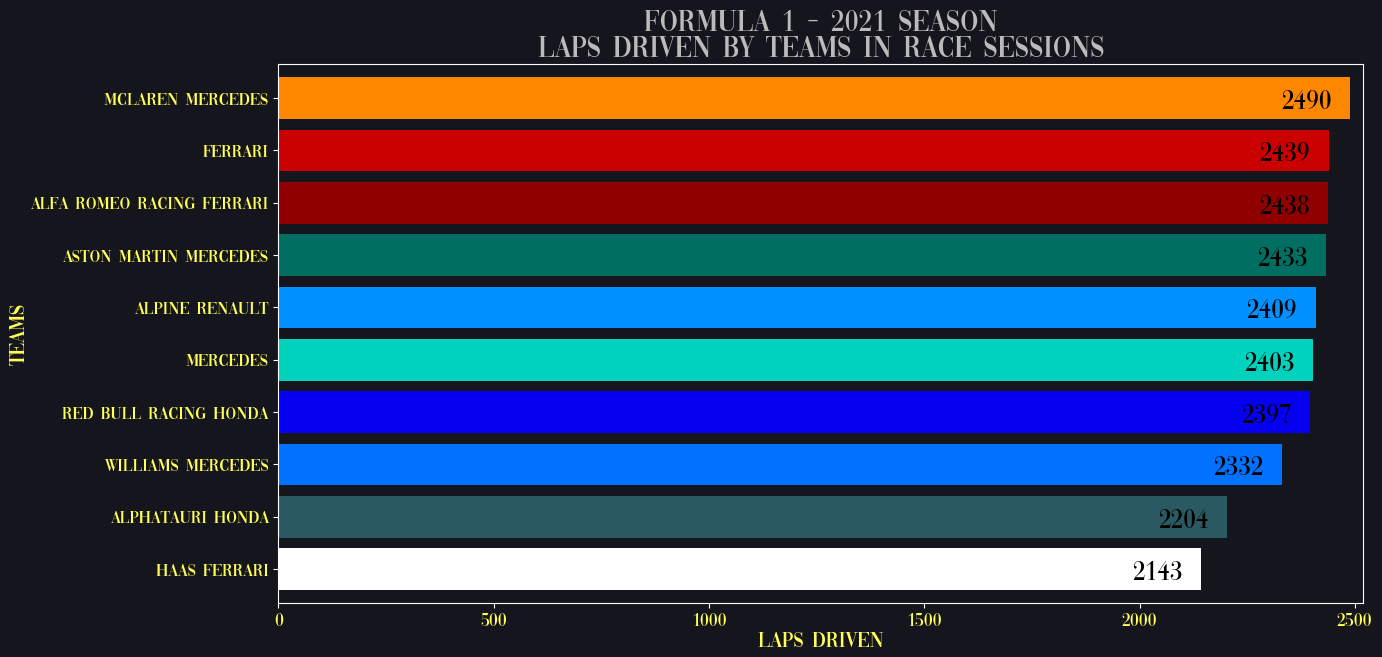

In [104]:
teamsLaps = raceResults.groupby('Team')['Laps'].sum().sort_values(ascending=False)
c = assign_color('teams', teamsLaps.index)
plt.figure(figsize=(14,7))
plt.axis([0, max(teamsLaps.values)+30, 9.65, -0.65])
plt.barh(teamsLaps.index, teamsLaps.values, color=c)
plt.title("Formula 1 - 2021 Season\nLaps Driven by Teams in Race Sessions", fontsize=22, fontweight='bold', color='#bbbbbb')
for i in range(len(teamsLaps)):
    plt.text(teamsLaps.values[i]-160, i+0.2, "{:4}".format(teamsLaps.values[i]), fontsize=20, color='k')
plt.xlabel('LAPS DRIVEN', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(fontsize=14, color='#ffff55')
plt.ylabel('TEAMS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=13, color='#ffff55')
plt.show()

Yep, with regards to teams, we can imply that **McLaren Mercedes** had the most driven laps according to the bar chart above. That's **87 laps** more than Mercedes team!

**Ferrari** and the customer team **Alfa Romeo** almost equalized their total driven laps, where the difference is **just 1**!

About the top two teams fighting for the titles in 2021 Season (yes, we mean **Mercedes** and **Red Bull**), they placed 6th and 7th, respectively for total laps and the German team was **only 6 laps** ahead.

Similar to laps driven analysis for all drivers, lastly, what about the **total distances driven** for each of them in racing sessions?

_Although this requires lots of data extraction below, believe me, this one is also worth to explain; and again, the calculation was performed on full driven laps..._

In [107]:
drivers = raceResults['Driver'].unique()
driversLapsEachTrack = {}
for driver in drivers:
    laps = raceResults[raceResults['Driver'] == driver]['Laps'].values
    if driver == 'Kimi Raikkönen':
        for i in [12, 13]:   laps = np.insert(laps, i, 0)
    if driver == 'Robert Kubica':
        for i in range(12):  laps = np.insert(laps, i, 0)
        for j in range(8):   laps = np.append(laps, 0)
    driversLapsEachTrack[driver] = laps

In [108]:
circuitLength = calendar['Circuit Length(km)'].values

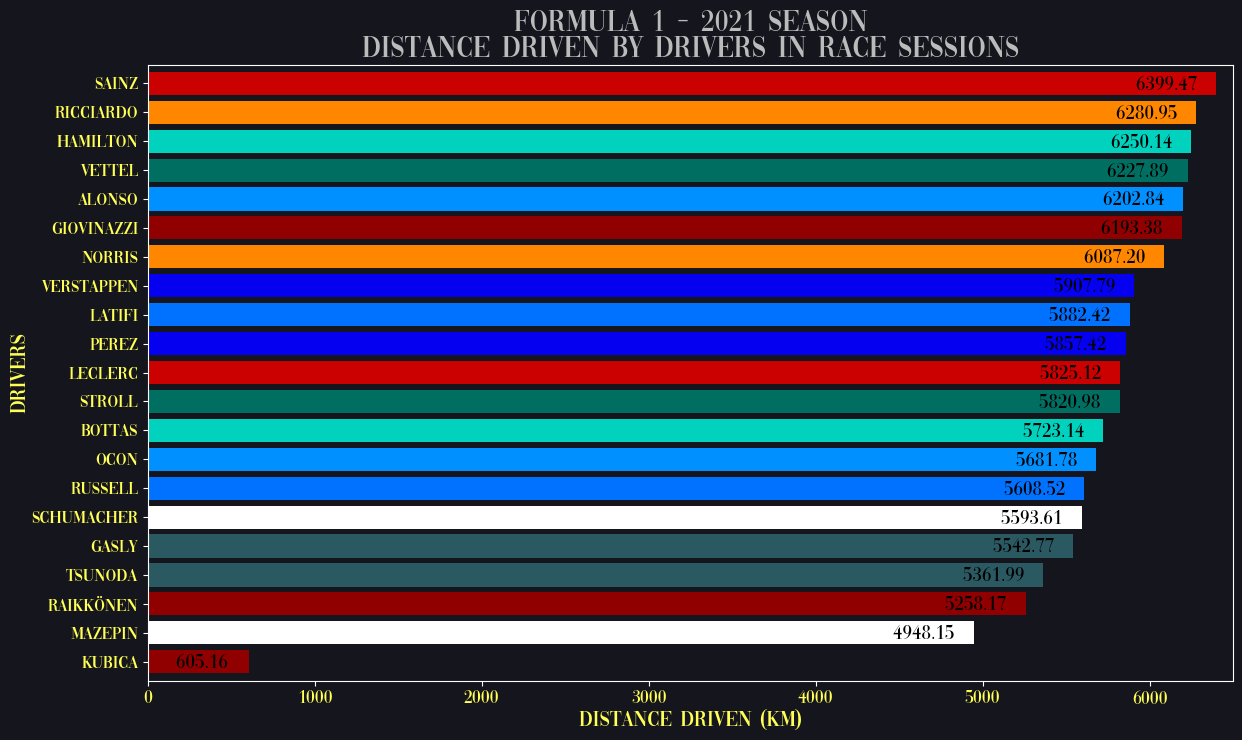

In [109]:
driversRaceDist = {}
for driver, laps in driversLapsEachTrack.items():
    driversRaceDist[driver] = round(laps@circuitLength, 2)
driversRaceDistSr = pd.Series(driversRaceDist.values(), driversRaceDist.keys()).sort_values(ascending=False)
c = assign_color("drivers", driversRaceDistSr.index)
plt.figure(figsize=(14,8))
plt.axis([0, max(driversRaceDistSr.values)+100, 20.65, -0.65])
plt.barh([driver.split()[1] for driver in driversRaceDistSr.index], driversRaceDistSr.values, color=c)
for i in range(len(driversRaceDistSr)):
    plt.text(driversRaceDistSr.values[i]-530, i+0.22, "{:8.2f}".format(driversRaceDistSr.values[i]), fontsize=15, color='k')
plt.title("Formula 1 - 2021 Season\nDistance Driven by Drivers in Race Sessions", 
          fontsize=22, fontweight="bold", color="#bbbbbb")
plt.xlabel('DISTANCE DRIVEN (km)', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=13, color='#ffff55')
plt.show()

Here above, just like the total laps driven, **Carlos Sainz went the most distance** (in kilometres) through all race sessions! It is noticeable that the difference between him and **Ricciardo** is more than 100 km.

Remarkably, Verstappen became the champion of this season with **slightly less than 6000 km** total race distance driven, while the runner-up **Hamilton** travelled **300 km more** than the Dutchman.

On the one side, it was revealed that Mazepin was the only driver who covered **not more than 5000 km** race distance. Could this be because of his high number of DNFs he had?

In addition, if we sum the distances of Raikkönen and Kubica together, that will be **5863.33 km** which could be placed between Latifi and Perez.

## End of Formula 1 2022 Season Analysis

## Once again, thank you very much for reading the analysis, and keep up with Formula 1!

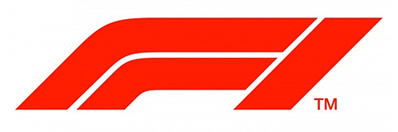